# Подбор по сетке параметров нейросети для предсказания параметроов "Модуль упругости при растяжении, ГПа" и "Прочность при растяжении, МПа"

Предобработка

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#директория проекта
diraddr = 'C:/Users/leleg/OneDrive/data_science_course/_вкр/project/'

In [3]:
#загрузить подготовленные данные
df = pd.read_csv(diraddr + 'data/processed/df_no_outliers.csv')
df.drop(columns=['Unnamed: 0'],inplace = True)

In [4]:
#стандартизация
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.rename(columns={
    0:'UN',
    1:'ShN',
    2:'PN',
    3:'SMN',
    4:'P',
    5:'MU',
    6:'KO',
    7:'SEG',
    8:'TV',
    9:'PP',
    10:'MUR',
    11:'PR',
    12:'PS'
}, inplace = True)
df.describe().T

count          mean     std       min       25%       50%       75%  \
UN   1000.0  1.136868e-16  1.0005 -0.992032 -0.992032 -0.992032  1.008032   
ShN  1000.0  9.059420e-17  1.0005 -2.688459 -0.705968  0.004536  0.656468   
PN   1000.0  3.836931e-16  1.0005 -3.100091 -0.623597  0.016527  0.646511   
SMN  1000.0  1.314504e-16  1.0005 -2.803951 -0.679291 -0.030263  0.679968   
P    1000.0 -7.105427e-17  1.0005 -2.618315 -0.710036  0.026311  0.627520   
MU   1000.0  1.527667e-16  1.0005 -2.248871 -0.726683  0.007553  0.681087   
KO   1000.0 -2.877698e-16  1.0005 -2.903025 -0.656889 -0.006077  0.683207   
SEG  1000.0 -2.655653e-16  1.0005 -2.744234 -0.693379 -0.005911  0.729875   
TV   1000.0  1.078249e-15  1.0005 -2.797028 -0.667807 -0.002570  0.673238   
PP   1000.0  3.907985e-17  1.0005 -1.726601 -0.766932 -0.104429  0.762593   
MUR  1000.0  1.564082e-15  1.0005 -2.976653 -0.664904 -0.028212  0.645317   
PR   1000.0 -6.785683e-16  1.0005 -2.945726 -0.681409 -0.017472  0.609149   
PS   1000.0 -1.563194e-16  1.0005 -3.007796 -0.652491  0.007530  0.665712   

          max  
UN   1.008032  
ShN  2.945439  
PN   3.014156  
SMN  2.923452  
P    2.980590  
MU   2.781893  
KO   2.944814  
SEG  2.819721  
TV   2.926921  
PP   2.923534  
MUR  3.008705  
PR   2.854064  
PS   2.862566

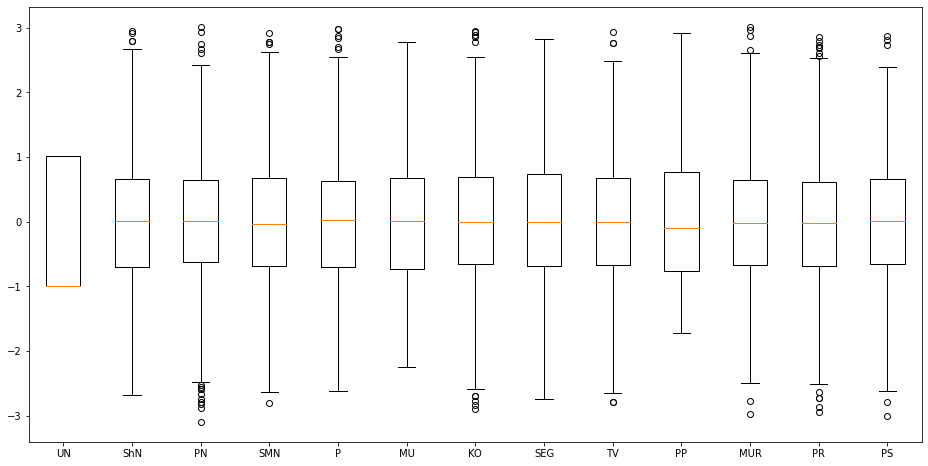

In [5]:
#вывод ящиков
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.boxplot(df, labels = df.columns)
plt.show()

In [6]:
#преобразовать в массивы
x = np.array(df.drop(columns=['SMN','MUR','PR',])) #входы
y = np.array(df.drop(columns=['UN','ShN','PN','SMN','P','MU','KO','SEG','TV','PP','PS'])) #выход

In [7]:
#разделить оба массива на train и test 70 на 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700, 2), (300, 2))

Grid Search

In [8]:
#поиск по сетке с дефолтными параметрами
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_list = {'hidden_layer_sizes': [(100,100,100),(14,),(50,)],
             'activation': ['identity', 'logistic', 'tahn', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'alpha': [0.0001],
             'max_iter': [1000],
             'verbose': [1]}
regr = GridSearchCV(MLPRegressor(), param_list, cv = 10, verbose = 1).fit(x_train, y_train)
regr.predict(x_test)
regr.score(x_test, y_test)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Iteration 1, loss = 0.90330576
Iteration 2, loss = 0.71964369
Iteration 3, loss = 0.57522250
Iteration 4, loss = 0.51522814
Iteration 5, loss = 0.50350656
Iteration 6, loss = 0.50152766
Iteration 7, loss = 0.49875973
Iteration 8, loss = 0.49508828
Iteration 9, loss = 0.49143588
Iteration 10, loss = 0.49014601
Iteration 11, loss = 0.48889242
Iteration 12, loss = 0.48708496
Iteration 13, loss = 0.48620805
Iteration 14, loss = 0.48621414
Iteration 15, loss = 0.48581301
Iteration 16, loss = 0.48540468
Iteration 17, loss = 0.48535907
Iteration 18, loss = 0.48549371
Iteration 19, loss = 0.48528418
Iteration 20, loss = 0.48543165
Iteration 21, loss = 0.48568587
Iteration 22, loss = 0.48648003
Iteration 23, loss = 0.48615876
Iteration 24, loss = 0.48644116
Iteration 25, loss = 0.48603599
Iteration 26, loss = 0.48582737
Iteration 27, loss = 0.48569900
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. St

Iteration 24, loss = 0.47994748
Iteration 25, loss = 0.47980698
Iteration 26, loss = 0.48039728
Iteration 27, loss = 0.47998018
Iteration 28, loss = 0.48053107
Iteration 29, loss = 0.48055741
Iteration 30, loss = 0.48033035
Iteration 31, loss = 0.48034639
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.81795675
Iteration 2, loss = 0.68720811
Iteration 3, loss = 0.57515691
Iteration 4, loss = 0.52263082
Iteration 5, loss = 0.50696427
Iteration 6, loss = 0.50718850
Iteration 7, loss = 0.50738133
Iteration 8, loss = 0.50519216
Iteration 9, loss = 0.50197547
Iteration 10, loss = 0.50063171
Iteration 11, loss = 0.50036070
Iteration 12, loss = 0.50014730
Iteration 13, loss = 0.49954473
Iteration 14, loss = 0.49889082
Iteration 15, loss = 0.49895421
Iteration 16, loss = 0.49969019
Iteration 17, loss = 0.49958522
Iteration 18, loss = 0.49969572
Iteration 19, loss = 0.49971629
Iteration 20, loss = 0.49966169
Iteration 21, loss = 0.

Iteration 78, loss = 0.48682321
Iteration 79, loss = 0.48687087
Iteration 80, loss = 0.48698317
Iteration 81, loss = 0.48697962
Iteration 82, loss = 0.48700464
Iteration 83, loss = 0.48690819
Iteration 84, loss = 0.48698113
Iteration 85, loss = 0.48698668
Iteration 86, loss = 0.48685969
Iteration 87, loss = 0.48680305
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.25115208
Iteration 2, loss = 1.16159725
Iteration 3, loss = 1.04000297
Iteration 4, loss = 0.92161449
Iteration 5, loss = 0.81713515
Iteration 6, loss = 0.74055296
Iteration 7, loss = 0.67974097
Iteration 8, loss = 0.63583926
Iteration 9, loss = 0.60333272
Iteration 10, loss = 0.58046513
Iteration 11, loss = 0.56292253
Iteration 12, loss = 0.54985551
Iteration 13, loss = 0.53992242
Iteration 14, loss = 0.53112656
Iteration 15, loss = 0.52483107
Iteration 16, loss = 0.51934948
Iteration 17, loss = 0.51470413
Iteration 18, loss = 0.51103041
Iteration 19, loss = 0.

Iteration 1, loss = 1.02131786
Iteration 2, loss = 0.96862781
Iteration 3, loss = 0.89738871
Iteration 4, loss = 0.82114908
Iteration 5, loss = 0.75147823
Iteration 6, loss = 0.69632694
Iteration 7, loss = 0.65046093
Iteration 8, loss = 0.61437502
Iteration 9, loss = 0.58807134
Iteration 10, loss = 0.56663161
Iteration 11, loss = 0.55106499
Iteration 12, loss = 0.53850280
Iteration 13, loss = 0.52873500
Iteration 14, loss = 0.52124129
Iteration 15, loss = 0.51450244
Iteration 16, loss = 0.50925463
Iteration 17, loss = 0.50459246
Iteration 18, loss = 0.50101662
Iteration 19, loss = 0.49791743
Iteration 20, loss = 0.49551356
Iteration 21, loss = 0.49353157
Iteration 22, loss = 0.49180278
Iteration 23, loss = 0.49037305
Iteration 24, loss = 0.48913716
Iteration 25, loss = 0.48797599
Iteration 26, loss = 0.48698049
Iteration 27, loss = 0.48617435
Iteration 28, loss = 0.48539597
Iteration 29, loss = 0.48470742
Iteration 30, loss = 0.48427393
Iteration 31, loss = 0.48381508
Iteration 32, los

Iteration 82, loss = 0.48490673
Iteration 83, loss = 0.48490991
Iteration 84, loss = 0.48481292
Iteration 85, loss = 0.48477835
Iteration 86, loss = 0.48462904
Iteration 87, loss = 0.48460449
Iteration 88, loss = 0.48447832
Iteration 89, loss = 0.48448682
Iteration 90, loss = 0.48434537
Iteration 91, loss = 0.48439607
Iteration 92, loss = 0.48427135
Iteration 93, loss = 0.48423482
Iteration 94, loss = 0.48426147
Iteration 95, loss = 0.48420421
Iteration 96, loss = 0.48433045
Iteration 97, loss = 0.48437663
Iteration 98, loss = 0.48434904
Iteration 99, loss = 0.48436926
Iteration 100, loss = 0.48428439
Iteration 101, loss = 0.48426925
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.21041808
Iteration 2, loss = 1.14991097
Iteration 3, loss = 1.09396989
Iteration 4, loss = 1.04125108
Iteration 5, loss = 0.99418557
Iteration 6, loss = 0.94967611
Iteration 7, loss = 0.90910199
Iteration 8, loss = 0.87266154
Iteration 9, loss = 

Iteration 21, loss = 0.55844170
Iteration 22, loss = 0.55137890
Iteration 23, loss = 0.54522888
Iteration 24, loss = 0.53921139
Iteration 25, loss = 0.53397503
Iteration 26, loss = 0.52941369
Iteration 27, loss = 0.52514538
Iteration 28, loss = 0.52120881
Iteration 29, loss = 0.51741116
Iteration 30, loss = 0.51426613
Iteration 31, loss = 0.51098413
Iteration 32, loss = 0.50807541
Iteration 33, loss = 0.50552482
Iteration 34, loss = 0.50319400
Iteration 35, loss = 0.50109654
Iteration 36, loss = 0.49940666
Iteration 37, loss = 0.49745576
Iteration 38, loss = 0.49613185
Iteration 39, loss = 0.49459610
Iteration 40, loss = 0.49351533
Iteration 41, loss = 0.49221410
Iteration 42, loss = 0.49119797
Iteration 43, loss = 0.49028560
Iteration 44, loss = 0.48926164
Iteration 45, loss = 0.48857084
Iteration 46, loss = 0.48773112
Iteration 47, loss = 0.48696047
Iteration 48, loss = 0.48630927
Iteration 49, loss = 0.48569947
Iteration 50, loss = 0.48528643
Iteration 51, loss = 0.48487221
Iteratio

Iteration 61, loss = 0.48808653
Iteration 62, loss = 0.48810973
Iteration 63, loss = 0.48814541
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.22995656
Iteration 2, loss = 1.17223300
Iteration 3, loss = 1.12086176
Iteration 4, loss = 1.07181104
Iteration 5, loss = 1.02775256
Iteration 6, loss = 0.98484738
Iteration 7, loss = 0.94605268
Iteration 8, loss = 0.91019341
Iteration 9, loss = 0.87693616
Iteration 10, loss = 0.84644002
Iteration 11, loss = 0.81803363
Iteration 12, loss = 0.79275519
Iteration 13, loss = 0.76790348
Iteration 14, loss = 0.74636327
Iteration 15, loss = 0.72531812
Iteration 16, loss = 0.70687673
Iteration 17, loss = 0.68824456
Iteration 18, loss = 0.67123614
Iteration 19, loss = 0.65572848
Iteration 20, loss = 0.64084902
Iteration 21, loss = 0.62753420
Iteration 22, loss = 0.61482769
Iteration 23, loss = 0.60277436
Iteration 24, loss = 0.59201733
Iteration 25, loss = 0.58207498
Iteration 26, loss = 0.

Iteration 54, loss = 0.48398525
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.77888594
Iteration 2, loss = 0.74553783
Iteration 3, loss = 0.69918566
Iteration 4, loss = 0.65200128
Iteration 5, loss = 0.60910210
Iteration 6, loss = 0.57391955
Iteration 7, loss = 0.54789580
Iteration 8, loss = 0.53012915
Iteration 9, loss = 0.51810110
Iteration 10, loss = 0.50978704
Iteration 11, loss = 0.50446748
Iteration 12, loss = 0.50064224
Iteration 13, loss = 0.49841413
Iteration 14, loss = 0.49690905
Iteration 15, loss = 0.49562393
Iteration 16, loss = 0.49465813
Iteration 17, loss = 0.49401216
Iteration 18, loss = 0.49338301
Iteration 19, loss = 0.49312774
Iteration 20, loss = 0.49270116
Iteration 21, loss = 0.49252115
Iteration 22, loss = 0.49235361
Iteration 23, loss = 0.49213990
Iteration 24, loss = 0.49190904
Iteration 25, loss = 0.49190236
Iteration 26, loss = 0.49177860
Iteration 27, loss = 0.49169322
Iteration 28, loss = 0.

Iteration 11, loss = 0.49840054
Iteration 12, loss = 0.49249095
Iteration 13, loss = 0.48833819
Iteration 14, loss = 0.48566730
Iteration 15, loss = 0.48376322
Iteration 16, loss = 0.48246879
Iteration 17, loss = 0.48141949
Iteration 18, loss = 0.48079859
Iteration 19, loss = 0.48023556
Iteration 20, loss = 0.47996137
Iteration 21, loss = 0.47960414
Iteration 22, loss = 0.47956117
Iteration 23, loss = 0.47935115
Iteration 24, loss = 0.47914675
Iteration 25, loss = 0.47910131
Iteration 26, loss = 0.47885959
Iteration 27, loss = 0.47888003
Iteration 28, loss = 0.47902251
Iteration 29, loss = 0.47900475
Iteration 30, loss = 0.47887230
Iteration 31, loss = 0.47891044
Iteration 32, loss = 0.47904374
Iteration 33, loss = 0.47897981
Iteration 34, loss = 0.47883298
Iteration 35, loss = 0.47890096
Iteration 36, loss = 0.47885348
Iteration 37, loss = 0.47877825
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79891458
Iteration 2, lo

Iteration 34, loss = 0.48940529
Iteration 35, loss = 0.48926091
Iteration 36, loss = 0.48903053
Iteration 37, loss = 0.48870952
Iteration 38, loss = 0.48885598
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75750855
Iteration 2, loss = 0.69090412
Iteration 3, loss = 0.63623002
Iteration 4, loss = 0.59155879
Iteration 5, loss = 0.55970045
Iteration 6, loss = 0.53532334
Iteration 7, loss = 0.51750986
Iteration 8, loss = 0.50486479
Iteration 9, loss = 0.49741638
Iteration 10, loss = 0.49233425
Iteration 11, loss = 0.48926611
Iteration 12, loss = 0.48770587
Iteration 13, loss = 0.48616418
Iteration 14, loss = 0.48482766
Iteration 15, loss = 0.48433785
Iteration 16, loss = 0.48361876
Iteration 17, loss = 0.48357558
Iteration 18, loss = 0.48364723
Iteration 19, loss = 0.48375610
Iteration 20, loss = 0.48428802
Iteration 21, loss = 0.48412831
Iteration 22, loss = 0.48399497
Iteration 23, loss = 0.48379055
Iteration 24, loss = 0.

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

Iteration 1, loss = 0.62743301
Iteration 2, loss = 0.54522523
Iteration 3, loss = 0.50031079
Iteration 4, loss = 0.49826687
Iteration 5, loss = 0.50699220
Iteration 6, loss = 0.50677812
Iteration 7, loss = 0.50020815
Iteration 8, loss = 0.49594598
Iteration 9, loss = 0.49411369
Iteration 10, loss = 0.49533050
Iteration 11, loss = 0.49492966
Iteration 12, loss = 0.49482883
Iteration 13, loss = 0.49482012
Iteration 14, loss = 0.49458038
Iteration 15, loss = 0.49442318
Iteration 16, loss = 0.49431914
Iteration 17, loss = 0.49438394
Iteration 18, loss = 0.49440379
Iteration 19, loss = 0.49443453
Iteration 20, loss = 0.49456443
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50898230
Iteration 2, loss = 0.50396654
Iteration 3, loss = 0.50156719
Iteration 4, loss = 0.50169545
Iteration 5, loss = 0.50199742
Iteration 6, loss = 0.50187584
Iteration 7, loss = 0.50133439
Iteration 8, loss = 0.50164993
Iteration 9, loss = 0.50282756


Iteration 28, loss = 0.49600530
Iteration 29, loss = 0.49445318
Iteration 30, loss = 0.49554671
Iteration 31, loss = 0.49372290
Iteration 32, loss = 0.49324099
Iteration 33, loss = 0.49391574
Iteration 34, loss = 0.49614135
Iteration 35, loss = 0.49634886
Iteration 36, loss = 0.49281475
Iteration 37, loss = 0.49617810
Iteration 38, loss = 0.49336578
Iteration 39, loss = 0.49403463
Iteration 40, loss = 0.49569758
Iteration 41, loss = 0.49304473
Iteration 42, loss = 0.49412975
Iteration 43, loss = 0.49541979
Iteration 44, loss = 0.49290372
Iteration 45, loss = 0.50240634
Iteration 46, loss = 0.50261240
Iteration 47, loss = 0.49409743
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56166369
Iteration 2, loss = 0.50881782
Iteration 3, loss = 0.52640477
Iteration 4, loss = 0.51537001
Iteration 5, loss = 0.50086903
Iteration 6, loss = 0.50383127
Iteration 7, loss = 0.50888726
Iteration 8, loss = 0.50417067
Iteration 9, loss = 0.

Iteration 15, loss = 0.49995960
Iteration 16, loss = 0.49957785
Iteration 17, loss = 0.49978621
Iteration 18, loss = 0.50149707
Iteration 19, loss = 0.50057872
Iteration 20, loss = 0.49980788
Iteration 21, loss = 0.49985111
Iteration 22, loss = 0.50117576
Iteration 23, loss = 0.49892071
Iteration 24, loss = 0.49984717
Iteration 25, loss = 0.49965992
Iteration 26, loss = 0.49944164
Iteration 27, loss = 0.49965613
Iteration 28, loss = 0.49888225
Iteration 29, loss = 0.49876677
Iteration 30, loss = 0.49868862
Iteration 31, loss = 0.49991008
Iteration 32, loss = 0.50016926
Iteration 33, loss = 0.49936401
Iteration 34, loss = 0.49894453
Iteration 35, loss = 0.49994243
Iteration 36, loss = 0.49918367
Iteration 37, loss = 0.49806112
Iteration 38, loss = 0.49813898
Iteration 39, loss = 0.49809233
Iteration 40, loss = 0.49775368
Iteration 41, loss = 0.49922786
Iteration 42, loss = 0.50058153
Iteration 43, loss = 0.49752667
Iteration 44, loss = 0.49818163
Iteration 45, loss = 0.49738914
Iteratio

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

Iteration 1, loss = 0.57727754
Iteration 2, loss = 0.56669274
Iteration 3, loss = 0.55163373
Iteration 4, loss = 0.53688369
Iteration 5, loss = 0.52425591
Iteration 6, loss = 0.51427913
Iteration 7, loss = 0.50726580
Iteration 8, loss = 0.50272867
Iteration 9, loss = 0.50004367
Iteration 10, loss = 0.49842653
Iteration 11, loss = 0.49761601
Iteration 12, loss = 0.49706304
Iteration 13, loss = 0.49689139
Iteration 14, loss = 0.49668460
Iteration 15, loss = 0.49665966
Iteration 16, loss = 0.49671731
Iteration 17, loss = 0.49666730
Iteration 18, loss = 0.49658364
Iteration 19, loss = 0.49650701
Iteration 20, loss = 0.49641721
Iteration 21, loss = 0.49640950
Iteration 22, loss = 0.49626445
Iteration 23, loss = 0.49619555
Iteration 24, loss = 0.49614225
Iteration 25, loss = 0.49608601
Iteration 26, loss = 0.49612776
Iteration 27, loss = 0.49609492
Iteration 28, loss = 0.49602232
Iteration 29, loss = 0.49597152
Iteration 30, loss = 0.49591703
Iteration 31, loss = 0.49586224
Iteration 32, los

Iteration 1, loss = 0.63183913
Iteration 2, loss = 0.61528108
Iteration 3, loss = 0.59284770
Iteration 4, loss = 0.56874148
Iteration 5, loss = 0.54873728
Iteration 6, loss = 0.53214516
Iteration 7, loss = 0.52185192
Iteration 8, loss = 0.51368714
Iteration 9, loss = 0.50862830
Iteration 10, loss = 0.50602466
Iteration 11, loss = 0.50456770
Iteration 12, loss = 0.50367785
Iteration 13, loss = 0.50334817
Iteration 14, loss = 0.50314784
Iteration 15, loss = 0.50294782
Iteration 16, loss = 0.50299768
Iteration 17, loss = 0.50297559
Iteration 18, loss = 0.50291995
Iteration 19, loss = 0.50273941
Iteration 20, loss = 0.50272022
Iteration 21, loss = 0.50259648
Iteration 22, loss = 0.50255007
Iteration 23, loss = 0.50246580
Iteration 24, loss = 0.50246154
Iteration 25, loss = 0.50243465
Iteration 26, loss = 0.50233132
Iteration 27, loss = 0.50222692
Iteration 28, loss = 0.50212960
Iteration 29, loss = 0.50202489
Iteration 30, loss = 0.50191596
Iteration 31, loss = 0.50187834
Iteration 32, los

Iteration 59, loss = 0.49452072
Iteration 60, loss = 0.49445749
Iteration 61, loss = 0.49435872
Iteration 62, loss = 0.49421573
Iteration 63, loss = 0.49418481
Iteration 64, loss = 0.49411531
Iteration 65, loss = 0.49412452
Iteration 66, loss = 0.49412647
Iteration 67, loss = 0.49415457
Iteration 68, loss = 0.49417674
Iteration 69, loss = 0.49427301
Iteration 70, loss = 0.49414341
Iteration 71, loss = 0.49388306
Iteration 72, loss = 0.49376983
Iteration 73, loss = 0.49357541
Iteration 74, loss = 0.49346674
Iteration 75, loss = 0.49340646
Iteration 76, loss = 0.49334355
Iteration 77, loss = 0.49337649
Iteration 78, loss = 0.49352407
Iteration 79, loss = 0.49325208
Iteration 80, loss = 0.49318343
Iteration 81, loss = 0.49322522
Iteration 82, loss = 0.49301087
Iteration 83, loss = 0.49299785
Iteration 84, loss = 0.49292752
Iteration 85, loss = 0.49298063
Iteration 86, loss = 0.49294702
Iteration 87, loss = 0.49291004
Iteration 88, loss = 0.49280346
Iteration 89, loss = 0.49284159
Iteratio

Iteration 58, loss = 0.48514245
Iteration 59, loss = 0.48499645
Iteration 60, loss = 0.48481960
Iteration 61, loss = 0.48482338
Iteration 62, loss = 0.48473883
Iteration 63, loss = 0.48464532
Iteration 64, loss = 0.48454117
Iteration 65, loss = 0.48444040
Iteration 66, loss = 0.48437453
Iteration 67, loss = 0.48421278
Iteration 68, loss = 0.48424984
Iteration 69, loss = 0.48413843
Iteration 70, loss = 0.48402537
Iteration 71, loss = 0.48394367
Iteration 72, loss = 0.48392481
Iteration 73, loss = 0.48394718
Iteration 74, loss = 0.48402136
Iteration 75, loss = 0.48391938
Iteration 76, loss = 0.48377394
Iteration 77, loss = 0.48367174
Iteration 78, loss = 0.48360730
Iteration 79, loss = 0.48353017
Iteration 80, loss = 0.48349005
Iteration 81, loss = 0.48341246
Iteration 82, loss = 0.48334714
Iteration 83, loss = 0.48331534
Iteration 84, loss = 0.48326648
Iteration 85, loss = 0.48327613
Iteration 86, loss = 0.48321068
Iteration 87, loss = 0.48317607
Iteration 88, loss = 0.48312011
Training

Iteration 45, loss = 0.48192088
Iteration 46, loss = 0.48174801
Iteration 47, loss = 0.48165472
Iteration 48, loss = 0.48153422
Iteration 49, loss = 0.48139408
Iteration 50, loss = 0.48132564
Iteration 51, loss = 0.48125297
Iteration 52, loss = 0.48123528
Iteration 53, loss = 0.48113760
Iteration 54, loss = 0.48102574
Iteration 55, loss = 0.48098399
Iteration 56, loss = 0.48091914
Iteration 57, loss = 0.48083689
Iteration 58, loss = 0.48074953
Iteration 59, loss = 0.48071196
Iteration 60, loss = 0.48068912
Iteration 61, loss = 0.48063796
Iteration 62, loss = 0.48058072
Iteration 63, loss = 0.48048785
Iteration 64, loss = 0.48042826
Iteration 65, loss = 0.48037389
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63060959
Iteration 2, loss = 0.61440577
Iteration 3, loss = 0.60101068
Iteration 4, loss = 0.58838034
Iteration 5, loss = 0.57682484
Iteration 6, loss = 0.56696337
Iteration 7, loss = 0.55828314
Iteration 8, loss = 0

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

Iteration 1, loss = 0.50237086
Iteration 2, loss = 0.50166912
Iteration 3, loss = 0.50083643
Iteration 4, loss = 0.50003059
Iteration 5, loss = 0.49935703
Iteration 6, loss = 0.49875775
Iteration 7, loss = 0.49867078
Iteration 8, loss = 0.49857699
Iteration 9, loss = 0.49838750
Iteration 10, loss = 0.49831258
Iteration 11, loss = 0.49837493
Iteration 12, loss = 0.49829926
Iteration 13, loss = 0.49810730
Iteration 14, loss = 0.49803703
Iteration 15, loss = 0.49798671
Iteration 16, loss = 0.49813659
Iteration 17, loss = 0.49815242
Iteration 18, loss = 0.49833974
Iteration 19, loss = 0.49826663
Iteration 20, loss = 0.49800994
Iteration 21, loss = 0.49772128
Iteration 22, loss = 0.49760915
Iteration 23, loss = 0.49741105
Iteration 24, loss = 0.49732228
Iteration 25, loss = 0.49725494
Iteration 26, loss = 0.49716388
Iteration 27, loss = 0.49724499
Iteration 28, loss = 0.49739741
Iteration 29, loss = 0.49742715
Iteration 30, loss = 0.49727305
Iteration 31, loss = 0.49683993
Iteration 32, los

Iteration 12, loss = 0.50158821
Iteration 13, loss = 0.50166296
Iteration 14, loss = 0.50147975
Iteration 15, loss = 0.50142330
Iteration 16, loss = 0.50149659
Iteration 17, loss = 0.50140647
Iteration 18, loss = 0.50132229
Iteration 19, loss = 0.50114839
Iteration 20, loss = 0.50106734
Iteration 21, loss = 0.50089678
Iteration 22, loss = 0.50083761
Iteration 23, loss = 0.50079997
Iteration 24, loss = 0.50099254
Iteration 25, loss = 0.50113988
Iteration 26, loss = 0.50108084
Iteration 27, loss = 0.50098445
Iteration 28, loss = 0.50057998
Iteration 29, loss = 0.50040651
Iteration 30, loss = 0.50044825
Iteration 31, loss = 0.50035413
Iteration 32, loss = 0.50021079
Iteration 33, loss = 0.50013162
Iteration 34, loss = 0.50020934
Iteration 35, loss = 0.50015954
Iteration 36, loss = 0.50007102
Iteration 37, loss = 0.49999123
Iteration 38, loss = 0.49973735
Iteration 39, loss = 0.49987337
Iteration 40, loss = 0.49987003
Iteration 41, loss = 0.50019654
Iteration 42, loss = 0.50032785
Iteratio

Iteration 21, loss = 0.49425309
Iteration 22, loss = 0.49428118
Iteration 23, loss = 0.49446589
Iteration 24, loss = 0.49427088
Iteration 25, loss = 0.49413680
Iteration 26, loss = 0.49408160
Iteration 27, loss = 0.49408903
Iteration 28, loss = 0.49410094
Iteration 29, loss = 0.49404230
Iteration 30, loss = 0.49384353
Iteration 31, loss = 0.49359459
Iteration 32, loss = 0.49357605
Iteration 33, loss = 0.49380666
Iteration 34, loss = 0.49398920
Iteration 35, loss = 0.49416630
Iteration 36, loss = 0.49369027
Iteration 37, loss = 0.49339857
Iteration 38, loss = 0.49316038
Iteration 39, loss = 0.49337402
Iteration 40, loss = 0.49336005
Iteration 41, loss = 0.49334708
Iteration 42, loss = 0.49312517
Iteration 43, loss = 0.49291097
Iteration 44, loss = 0.49302678
Iteration 45, loss = 0.49302302
Iteration 46, loss = 0.49325598
Iteration 47, loss = 0.49299066
Iteration 48, loss = 0.49285285
Iteration 49, loss = 0.49267833
Iteration 50, loss = 0.49258392
Iteration 51, loss = 0.49248314
Iteratio

Iteration 121, loss = 0.50461727
Iteration 122, loss = 0.50472351
Iteration 123, loss = 0.50468408
Iteration 124, loss = 0.50454343
Iteration 125, loss = 0.50463221
Iteration 126, loss = 0.50449616
Iteration 127, loss = 0.50434999
Iteration 128, loss = 0.50429224
Iteration 129, loss = 0.50440016
Iteration 130, loss = 0.50444929
Iteration 131, loss = 0.50447270
Iteration 132, loss = 0.50440508
Iteration 133, loss = 0.50429489
Iteration 134, loss = 0.50416728
Iteration 135, loss = 0.50402456
Iteration 136, loss = 0.50403003
Iteration 137, loss = 0.50394480
Iteration 138, loss = 0.50388041
Iteration 139, loss = 0.50392143
Iteration 140, loss = 0.50394230
Iteration 141, loss = 0.50383065
Iteration 142, loss = 0.50377460
Iteration 143, loss = 0.50418268
Iteration 144, loss = 0.50381176
Iteration 145, loss = 0.50381234
Iteration 146, loss = 0.50375648
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51884770
Iteration 2, loss = 0

Iteration 34, loss = 0.48899660
Iteration 35, loss = 0.48841306
Iteration 36, loss = 0.48816272
Iteration 37, loss = 0.48829575
Iteration 38, loss = 0.48831258
Iteration 39, loss = 0.48815556
Iteration 40, loss = 0.48773412
Iteration 41, loss = 0.48780759
Iteration 42, loss = 0.48772451
Iteration 43, loss = 0.48804177
Iteration 44, loss = 0.48814868
Iteration 45, loss = 0.48751442
Iteration 46, loss = 0.48711114
Iteration 47, loss = 0.48764178
Iteration 48, loss = 0.48761512
Iteration 49, loss = 0.48764289
Iteration 50, loss = 0.48727831
Iteration 51, loss = 0.48716585
Iteration 52, loss = 0.48766024
Iteration 53, loss = 0.48802156
Iteration 54, loss = 0.48757312
Iteration 55, loss = 0.48668075
Iteration 56, loss = 0.48721883
Iteration 57, loss = 0.48812509
Iteration 58, loss = 0.48877868
Iteration 59, loss = 0.48809019
Iteration 60, loss = 0.48715770
Iteration 61, loss = 0.48665536
Iteration 62, loss = 0.48657045
Iteration 63, loss = 0.48696469
Iteration 64, loss = 0.48677661
Iteratio

Iteration 21, loss = 0.49061527
Iteration 22, loss = 0.49013502
Iteration 23, loss = 0.48991099
Iteration 24, loss = 0.48977326
Iteration 25, loss = 0.48966218
Iteration 26, loss = 0.48959750
Iteration 27, loss = 0.48950515
Iteration 28, loss = 0.48942968
Iteration 29, loss = 0.48924215
Iteration 30, loss = 0.48939825
Iteration 31, loss = 0.48902661
Iteration 32, loss = 0.48909122
Iteration 33, loss = 0.48908313
Iteration 34, loss = 0.48915265
Iteration 35, loss = 0.48933693
Iteration 36, loss = 0.48955854
Iteration 37, loss = 0.48921695
Iteration 38, loss = 0.48856274
Iteration 39, loss = 0.48843366
Iteration 40, loss = 0.48879646
Iteration 41, loss = 0.48888975
Iteration 42, loss = 0.48898966
Iteration 43, loss = 0.48849069
Iteration 44, loss = 0.48839453
Iteration 45, loss = 0.48842777
Iteration 46, loss = 0.48829301
Iteration 47, loss = 0.48823732
Iteration 48, loss = 0.48817414
Iteration 49, loss = 0.48822928
Iteration 50, loss = 0.48823843
Iteration 51, loss = 0.48814412
Iteratio

Iteration 19, loss = 0.49278112
Iteration 20, loss = 0.49226902
Iteration 21, loss = 0.49182131
Iteration 22, loss = 0.49122888
Iteration 23, loss = 0.49075852
Iteration 24, loss = 0.49025046
Iteration 25, loss = 0.48979956
Iteration 26, loss = 0.48932372
Iteration 27, loss = 0.48889103
Iteration 28, loss = 0.48840530
Iteration 29, loss = 0.48808340
Iteration 30, loss = 0.48779712
Iteration 31, loss = 0.48740738
Iteration 32, loss = 0.48694428
Iteration 33, loss = 0.48646448
Iteration 34, loss = 0.48594122
Iteration 35, loss = 0.48559689
Iteration 36, loss = 0.48511832
Iteration 37, loss = 0.48478640
Iteration 38, loss = 0.48437079
Iteration 39, loss = 0.48403560
Iteration 40, loss = 0.48366313
Iteration 41, loss = 0.48323957
Iteration 42, loss = 0.48284058
Iteration 43, loss = 0.48253996
Iteration 44, loss = 0.48225312
Iteration 45, loss = 0.48183817
Iteration 46, loss = 0.48145129
Iteration 47, loss = 0.48101824
Iteration 48, loss = 0.48075203
Iteration 49, loss = 0.48017751
Iteratio

Iteration 274, loss = 0.41819751
Iteration 275, loss = 0.41782601
Iteration 276, loss = 0.41750646
Iteration 277, loss = 0.41717587
Iteration 278, loss = 0.41706946
Iteration 279, loss = 0.41685193
Iteration 280, loss = 0.41657725
Iteration 281, loss = 0.41611090
Iteration 282, loss = 0.41565123
Iteration 283, loss = 0.41551455
Iteration 284, loss = 0.41516845
Iteration 285, loss = 0.41488308
Iteration 286, loss = 0.41456762
Iteration 287, loss = 0.41437190
Iteration 288, loss = 0.41416864
Iteration 289, loss = 0.41393219
Iteration 290, loss = 0.41361097
Iteration 291, loss = 0.41322636
Iteration 292, loss = 0.41277813
Iteration 293, loss = 0.41246018
Iteration 294, loss = 0.41225498
Iteration 295, loss = 0.41196516
Iteration 296, loss = 0.41156031
Iteration 297, loss = 0.41154546
Iteration 298, loss = 0.41117318
Iteration 299, loss = 0.41100169
Iteration 300, loss = 0.41078882
Iteration 301, loss = 0.41039719
Iteration 302, loss = 0.41000012
Iteration 303, loss = 0.40971452
Iteration 

Iteration 525, loss = 0.33983327
Iteration 526, loss = 0.33951097
Iteration 527, loss = 0.33899581
Iteration 528, loss = 0.33864939
Iteration 529, loss = 0.33876646
Iteration 530, loss = 0.33872727
Iteration 531, loss = 0.33839378
Iteration 532, loss = 0.33753937
Iteration 533, loss = 0.33724927
Iteration 534, loss = 0.33680765
Iteration 535, loss = 0.33650414
Iteration 536, loss = 0.33621566
Iteration 537, loss = 0.33558286
Iteration 538, loss = 0.33541681
Iteration 539, loss = 0.33511507
Iteration 540, loss = 0.33471437
Iteration 541, loss = 0.33430889
Iteration 542, loss = 0.33386152
Iteration 543, loss = 0.33331872
Iteration 544, loss = 0.33325653
Iteration 545, loss = 0.33300964
Iteration 546, loss = 0.33288315
Iteration 547, loss = 0.33250959
Iteration 548, loss = 0.33181381
Iteration 549, loss = 0.33134540
Iteration 550, loss = 0.33141725
Iteration 551, loss = 0.33136864
Iteration 552, loss = 0.33069915
Iteration 553, loss = 0.33020986
Iteration 554, loss = 0.32989074
Iteration 

Iteration 774, loss = 0.24541134
Iteration 775, loss = 0.24517190
Iteration 776, loss = 0.24504707
Iteration 777, loss = 0.24457019
Iteration 778, loss = 0.24429789
Iteration 779, loss = 0.24383590
Iteration 780, loss = 0.24382591
Iteration 781, loss = 0.24280680
Iteration 782, loss = 0.24250679
Iteration 783, loss = 0.24187259
Iteration 784, loss = 0.24162069
Iteration 785, loss = 0.24189807
Iteration 786, loss = 0.24135090
Iteration 787, loss = 0.24062870
Iteration 788, loss = 0.23998727
Iteration 789, loss = 0.23956496
Iteration 790, loss = 0.23929435
Iteration 791, loss = 0.23939694
Iteration 792, loss = 0.23880544
Iteration 793, loss = 0.23835431
Iteration 794, loss = 0.23786351
Iteration 795, loss = 0.23747632
Iteration 796, loss = 0.23712671
Iteration 797, loss = 0.23629990
Iteration 798, loss = 0.23639109
Iteration 799, loss = 0.23587352
Iteration 800, loss = 0.23504425
Iteration 801, loss = 0.23474008
Iteration 802, loss = 0.23456014
Iteration 803, loss = 0.23415006
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 8, loss = 0.51093557
Iteration 9, loss = 0.50984701
Iteration 10, loss = 0.50891583
Iteration 11, loss = 0.50789367
Iteration 12, loss = 0.50688072
Iteration 13, loss = 0.50586632
Iteration 14, loss = 0.50491944
Iteration 15, loss = 0.50406257
Iteration 16, loss = 0.50306293
Iteration 17, loss = 0.50217708
Iteration 18, loss = 0.50148927
Iteration 19, loss = 0.50038462
Iteration 20, loss = 0.49963412
Iteration 21, loss = 0.49878667
Iteration 22, loss = 0.49816295
Iteration 23, loss = 0.49738629
Iteration 24, loss = 0.49666697
Iteration 25, loss = 0.49596058
Iteration 26, loss = 0.49551360
Iteration 27, loss = 0.49467897
Iteration 28, loss = 0.49407709
Iteration 29, loss = 0.49343012
Iteration 30, loss = 0.49280602
Iteration 31, loss = 0.49213663
Iteration 32, loss = 0.49164953
Iteration 33, loss = 0.49108917
Iteration 34, loss = 0.49068622
Iteration 35, loss = 0.49032062
Iteration 36, loss = 0.48993690
Iteration 37, loss = 0.48947015
Iteration 38, loss = 0.48878292
Iteration

Iteration 266, loss = 0.40879338
Iteration 267, loss = 0.40837873
Iteration 268, loss = 0.40788869
Iteration 269, loss = 0.40752936
Iteration 270, loss = 0.40718883
Iteration 271, loss = 0.40684977
Iteration 272, loss = 0.40654599
Iteration 273, loss = 0.40618296
Iteration 274, loss = 0.40595349
Iteration 275, loss = 0.40566328
Iteration 276, loss = 0.40527669
Iteration 277, loss = 0.40502854
Iteration 278, loss = 0.40476076
Iteration 279, loss = 0.40441663
Iteration 280, loss = 0.40410982
Iteration 281, loss = 0.40372508
Iteration 282, loss = 0.40345966
Iteration 283, loss = 0.40311934
Iteration 284, loss = 0.40276327
Iteration 285, loss = 0.40231358
Iteration 286, loss = 0.40203976
Iteration 287, loss = 0.40145925
Iteration 288, loss = 0.40123459
Iteration 289, loss = 0.40088161
Iteration 290, loss = 0.40039751
Iteration 291, loss = 0.40007143
Iteration 292, loss = 0.39973776
Iteration 293, loss = 0.39937780
Iteration 294, loss = 0.39900301
Iteration 295, loss = 0.39858368
Iteration 

Iteration 518, loss = 0.31959706
Iteration 519, loss = 0.31916710
Iteration 520, loss = 0.31872979
Iteration 521, loss = 0.31856701
Iteration 522, loss = 0.31831659
Iteration 523, loss = 0.31807101
Iteration 524, loss = 0.31739873
Iteration 525, loss = 0.31714930
Iteration 526, loss = 0.31668684
Iteration 527, loss = 0.31636072
Iteration 528, loss = 0.31596774
Iteration 529, loss = 0.31559631
Iteration 530, loss = 0.31529133
Iteration 531, loss = 0.31473730
Iteration 532, loss = 0.31431164
Iteration 533, loss = 0.31409152
Iteration 534, loss = 0.31363330
Iteration 535, loss = 0.31328571
Iteration 536, loss = 0.31299556
Iteration 537, loss = 0.31259592
Iteration 538, loss = 0.31214351
Iteration 539, loss = 0.31186161
Iteration 540, loss = 0.31170081
Iteration 541, loss = 0.31124307
Iteration 542, loss = 0.31084756
Iteration 543, loss = 0.31083224
Iteration 544, loss = 0.31050023
Iteration 545, loss = 0.30969695
Iteration 546, loss = 0.30904742
Iteration 547, loss = 0.30897275
Iteration 

Iteration 771, loss = 0.22343541
Iteration 772, loss = 0.22288461
Iteration 773, loss = 0.22253650
Iteration 774, loss = 0.22211787
Iteration 775, loss = 0.22194163
Iteration 776, loss = 0.22113069
Iteration 777, loss = 0.22071505
Iteration 778, loss = 0.22056132
Iteration 779, loss = 0.22080495
Iteration 780, loss = 0.21988997
Iteration 781, loss = 0.21964716
Iteration 782, loss = 0.22075217
Iteration 783, loss = 0.21906550
Iteration 784, loss = 0.21814518
Iteration 785, loss = 0.21818128
Iteration 786, loss = 0.21763708
Iteration 787, loss = 0.21727743
Iteration 788, loss = 0.21683691
Iteration 789, loss = 0.21638293
Iteration 790, loss = 0.21615705
Iteration 791, loss = 0.21569229
Iteration 792, loss = 0.21500276
Iteration 793, loss = 0.21568981
Iteration 794, loss = 0.21498209
Iteration 795, loss = 0.21405003
Iteration 796, loss = 0.21404505
Iteration 797, loss = 0.21368028
Iteration 798, loss = 0.21298045
Iteration 799, loss = 0.21252743
Iteration 800, loss = 0.21202861
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 9, loss = 0.49884381
Iteration 10, loss = 0.49811801
Iteration 11, loss = 0.49725243
Iteration 12, loss = 0.49637236
Iteration 13, loss = 0.49577366
Iteration 14, loss = 0.49489448
Iteration 15, loss = 0.49407608
Iteration 16, loss = 0.49330052
Iteration 17, loss = 0.49251864
Iteration 18, loss = 0.49184753
Iteration 19, loss = 0.49114378
Iteration 20, loss = 0.49042880
Iteration 21, loss = 0.48982136
Iteration 22, loss = 0.48903904
Iteration 23, loss = 0.48848541
Iteration 24, loss = 0.48773380
Iteration 25, loss = 0.48713256
Iteration 26, loss = 0.48661305
Iteration 27, loss = 0.48620571
Iteration 28, loss = 0.48573475
Iteration 29, loss = 0.48519959
Iteration 30, loss = 0.48456749
Iteration 31, loss = 0.48400171
Iteration 32, loss = 0.48345778
Iteration 33, loss = 0.48290483
Iteration 34, loss = 0.48245006
Iteration 35, loss = 0.48193811
Iteration 36, loss = 0.48140910
Iteration 37, loss = 0.48087003
Iteration 38, loss = 0.48040492
Iteration 39, loss = 0.47985729
Iteratio

Iteration 264, loss = 0.40572784
Iteration 265, loss = 0.40548558
Iteration 266, loss = 0.40514390
Iteration 267, loss = 0.40482339
Iteration 268, loss = 0.40455298
Iteration 269, loss = 0.40416089
Iteration 270, loss = 0.40384295
Iteration 271, loss = 0.40391779
Iteration 272, loss = 0.40374085
Iteration 273, loss = 0.40320439
Iteration 274, loss = 0.40282051
Iteration 275, loss = 0.40247530
Iteration 276, loss = 0.40205437
Iteration 277, loss = 0.40164536
Iteration 278, loss = 0.40161407
Iteration 279, loss = 0.40131641
Iteration 280, loss = 0.40106040
Iteration 281, loss = 0.40071954
Iteration 282, loss = 0.40052719
Iteration 283, loss = 0.40013388
Iteration 284, loss = 0.39963092
Iteration 285, loss = 0.39933733
Iteration 286, loss = 0.39898634
Iteration 287, loss = 0.39861203
Iteration 288, loss = 0.39825629
Iteration 289, loss = 0.39784144
Iteration 290, loss = 0.39760828
Iteration 291, loss = 0.39723204
Iteration 292, loss = 0.39687752
Iteration 293, loss = 0.39658195
Iteration 

Iteration 517, loss = 0.31808514
Iteration 518, loss = 0.31758209
Iteration 519, loss = 0.31739334
Iteration 520, loss = 0.31730312
Iteration 521, loss = 0.31678131
Iteration 522, loss = 0.31650121
Iteration 523, loss = 0.31611494
Iteration 524, loss = 0.31570298
Iteration 525, loss = 0.31547070
Iteration 526, loss = 0.31492156
Iteration 527, loss = 0.31436580
Iteration 528, loss = 0.31404390
Iteration 529, loss = 0.31359936
Iteration 530, loss = 0.31345053
Iteration 531, loss = 0.31286958
Iteration 532, loss = 0.31234361
Iteration 533, loss = 0.31199818
Iteration 534, loss = 0.31160918
Iteration 535, loss = 0.31118849
Iteration 536, loss = 0.31092651
Iteration 537, loss = 0.31071254
Iteration 538, loss = 0.31011855
Iteration 539, loss = 0.30959541
Iteration 540, loss = 0.30919635
Iteration 541, loss = 0.30873012
Iteration 542, loss = 0.30845354
Iteration 543, loss = 0.30805142
Iteration 544, loss = 0.30765148
Iteration 545, loss = 0.30736573
Iteration 546, loss = 0.30712080
Iteration 

Iteration 768, loss = 0.21927799
Iteration 769, loss = 0.21853249
Iteration 770, loss = 0.21798221
Iteration 771, loss = 0.21773512
Iteration 772, loss = 0.21719386
Iteration 773, loss = 0.21755759
Iteration 774, loss = 0.21666587
Iteration 775, loss = 0.21591675
Iteration 776, loss = 0.21535675
Iteration 777, loss = 0.21545765
Iteration 778, loss = 0.21501651
Iteration 779, loss = 0.21474127
Iteration 780, loss = 0.21463055
Iteration 781, loss = 0.21467224
Iteration 782, loss = 0.21381436
Iteration 783, loss = 0.21267642
Iteration 784, loss = 0.21268752
Iteration 785, loss = 0.21215575
Iteration 786, loss = 0.21165207
Iteration 787, loss = 0.21178857
Iteration 788, loss = 0.21097954
Iteration 789, loss = 0.21042646
Iteration 790, loss = 0.21022329
Iteration 791, loss = 0.20980683
Iteration 792, loss = 0.20923547
Iteration 793, loss = 0.20891563
Iteration 794, loss = 0.20858702
Iteration 795, loss = 0.20802714
Iteration 796, loss = 0.20765189
Iteration 797, loss = 0.20707439
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 6, loss = 0.51585739
Iteration 7, loss = 0.51303529
Iteration 8, loss = 0.51136450
Iteration 9, loss = 0.51002224
Iteration 10, loss = 0.50815994
Iteration 11, loss = 0.50647214
Iteration 12, loss = 0.50490895
Iteration 13, loss = 0.50355048
Iteration 14, loss = 0.50211427
Iteration 15, loss = 0.50087931
Iteration 16, loss = 0.49971430
Iteration 17, loss = 0.49867207
Iteration 18, loss = 0.49771780
Iteration 19, loss = 0.49671984
Iteration 20, loss = 0.49573185
Iteration 21, loss = 0.49487554
Iteration 22, loss = 0.49411860
Iteration 23, loss = 0.49344291
Iteration 24, loss = 0.49251688
Iteration 25, loss = 0.49167370
Iteration 26, loss = 0.49079254
Iteration 27, loss = 0.48999335
Iteration 28, loss = 0.48923168
Iteration 29, loss = 0.48866806
Iteration 30, loss = 0.48795405
Iteration 31, loss = 0.48733373
Iteration 32, loss = 0.48672558
Iteration 33, loss = 0.48624311
Iteration 34, loss = 0.48571108
Iteration 35, loss = 0.48523281
Iteration 36, loss = 0.48475098
Iteration 3

Iteration 265, loss = 0.41639894
Iteration 266, loss = 0.41610413
Iteration 267, loss = 0.41601318
Iteration 268, loss = 0.41578972
Iteration 269, loss = 0.41550060
Iteration 270, loss = 0.41525069
Iteration 271, loss = 0.41498340
Iteration 272, loss = 0.41466693
Iteration 273, loss = 0.41435055
Iteration 274, loss = 0.41394949
Iteration 275, loss = 0.41366892
Iteration 276, loss = 0.41341216
Iteration 277, loss = 0.41316465
Iteration 278, loss = 0.41282910
Iteration 279, loss = 0.41257458
Iteration 280, loss = 0.41232679
Iteration 281, loss = 0.41210874
Iteration 282, loss = 0.41177519
Iteration 283, loss = 0.41147689
Iteration 284, loss = 0.41117858
Iteration 285, loss = 0.41085266
Iteration 286, loss = 0.41056344
Iteration 287, loss = 0.41025813
Iteration 288, loss = 0.41001294
Iteration 289, loss = 0.40964865
Iteration 290, loss = 0.40945609
Iteration 291, loss = 0.40928745
Iteration 292, loss = 0.40885921
Iteration 293, loss = 0.40866613
Iteration 294, loss = 0.40841202
Iteration 

Iteration 519, loss = 0.33651284
Iteration 520, loss = 0.33599070
Iteration 521, loss = 0.33529786
Iteration 522, loss = 0.33468310
Iteration 523, loss = 0.33435329
Iteration 524, loss = 0.33403648
Iteration 525, loss = 0.33383482
Iteration 526, loss = 0.33350773
Iteration 527, loss = 0.33320040
Iteration 528, loss = 0.33324531
Iteration 529, loss = 0.33291723
Iteration 530, loss = 0.33225301
Iteration 531, loss = 0.33164070
Iteration 532, loss = 0.33162460
Iteration 533, loss = 0.33145096
Iteration 534, loss = 0.33077757
Iteration 535, loss = 0.33008001
Iteration 536, loss = 0.32979900
Iteration 537, loss = 0.32941819
Iteration 538, loss = 0.32878647
Iteration 539, loss = 0.32833834
Iteration 540, loss = 0.32806390
Iteration 541, loss = 0.32764979
Iteration 542, loss = 0.32736809
Iteration 543, loss = 0.32697770
Iteration 544, loss = 0.32662957
Iteration 545, loss = 0.32619072
Iteration 546, loss = 0.32599214
Iteration 547, loss = 0.32542808
Iteration 548, loss = 0.32501689
Iteration 

Iteration 774, loss = 0.22788687
Iteration 775, loss = 0.22734433
Iteration 776, loss = 0.22700470
Iteration 777, loss = 0.22642242
Iteration 778, loss = 0.22628662
Iteration 779, loss = 0.22674670
Iteration 780, loss = 0.22603094
Iteration 781, loss = 0.22471099
Iteration 782, loss = 0.22424709
Iteration 783, loss = 0.22442593
Iteration 784, loss = 0.22338450
Iteration 785, loss = 0.22354156
Iteration 786, loss = 0.22349458
Iteration 787, loss = 0.22216923
Iteration 788, loss = 0.22101850
Iteration 789, loss = 0.22137496
Iteration 790, loss = 0.22062426
Iteration 791, loss = 0.22029201
Iteration 792, loss = 0.21998167
Iteration 793, loss = 0.21937331
Iteration 794, loss = 0.21883565
Iteration 795, loss = 0.21877488
Iteration 796, loss = 0.21786254
Iteration 797, loss = 0.21753498
Iteration 798, loss = 0.21681826
Iteration 799, loss = 0.21625212
Iteration 800, loss = 0.21587263
Iteration 801, loss = 0.21545889
Iteration 802, loss = 0.21488630
Iteration 803, loss = 0.21427470
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 0.52043433
Iteration 3, loss = 0.51493261
Iteration 4, loss = 0.50933330
Iteration 5, loss = 0.50516908
Iteration 6, loss = 0.50226882
Iteration 7, loss = 0.49983593
Iteration 8, loss = 0.49864514
Iteration 9, loss = 0.49742911
Iteration 10, loss = 0.49650480
Iteration 11, loss = 0.49584034
Iteration 12, loss = 0.49517886
Iteration 13, loss = 0.49439052
Iteration 14, loss = 0.49361137
Iteration 15, loss = 0.49286951
Iteration 16, loss = 0.49216730
Iteration 17, loss = 0.49151724
Iteration 18, loss = 0.49085441
Iteration 19, loss = 0.49017621
Iteration 20, loss = 0.48959205
Iteration 21, loss = 0.48895742
Iteration 22, loss = 0.48839750
Iteration 23, loss = 0.48782689
Iteration 24, loss = 0.48727966
Iteration 25, loss = 0.48676970
Iteration 26, loss = 0.48618434
Iteration 27, loss = 0.48567702
Iteration 28, loss = 0.48516428
Iteration 29, loss = 0.48459887
Iteration 30, loss = 0.48403441
Iteration 31, loss = 0.48353686
Iteration 32, loss = 0.48290744
Iteration 33, l

Iteration 254, loss = 0.41573302
Iteration 255, loss = 0.41541408
Iteration 256, loss = 0.41510878
Iteration 257, loss = 0.41485681
Iteration 258, loss = 0.41458439
Iteration 259, loss = 0.41429927
Iteration 260, loss = 0.41404619
Iteration 261, loss = 0.41384289
Iteration 262, loss = 0.41357590
Iteration 263, loss = 0.41323296
Iteration 264, loss = 0.41295548
Iteration 265, loss = 0.41261344
Iteration 266, loss = 0.41253297
Iteration 267, loss = 0.41219642
Iteration 268, loss = 0.41183104
Iteration 269, loss = 0.41162930
Iteration 270, loss = 0.41137662
Iteration 271, loss = 0.41125072
Iteration 272, loss = 0.41082432
Iteration 273, loss = 0.41055219
Iteration 274, loss = 0.41027572
Iteration 275, loss = 0.40998027
Iteration 276, loss = 0.40964212
Iteration 277, loss = 0.40945978
Iteration 278, loss = 0.40911350
Iteration 279, loss = 0.40893667
Iteration 280, loss = 0.40857205
Iteration 281, loss = 0.40817362
Iteration 282, loss = 0.40806292
Iteration 283, loss = 0.40763958
Iteration 

Iteration 507, loss = 0.33771494
Iteration 508, loss = 0.33742567
Iteration 509, loss = 0.33718096
Iteration 510, loss = 0.33675717
Iteration 511, loss = 0.33639389
Iteration 512, loss = 0.33585411
Iteration 513, loss = 0.33542055
Iteration 514, loss = 0.33514608
Iteration 515, loss = 0.33470180
Iteration 516, loss = 0.33443260
Iteration 517, loss = 0.33402522
Iteration 518, loss = 0.33387482
Iteration 519, loss = 0.33339548
Iteration 520, loss = 0.33314236
Iteration 521, loss = 0.33319340
Iteration 522, loss = 0.33259827
Iteration 523, loss = 0.33214958
Iteration 524, loss = 0.33155161
Iteration 525, loss = 0.33117403
Iteration 526, loss = 0.33077823
Iteration 527, loss = 0.33049074
Iteration 528, loss = 0.33022130
Iteration 529, loss = 0.33012062
Iteration 530, loss = 0.32963637
Iteration 531, loss = 0.32911686
Iteration 532, loss = 0.32871496
Iteration 533, loss = 0.32833063
Iteration 534, loss = 0.32797442
Iteration 535, loss = 0.32772690
Iteration 536, loss = 0.32744716
Iteration 

Iteration 757, loss = 0.24386053
Iteration 758, loss = 0.24367110
Iteration 759, loss = 0.24278324
Iteration 760, loss = 0.24217834
Iteration 761, loss = 0.24231280
Iteration 762, loss = 0.24204661
Iteration 763, loss = 0.24138834
Iteration 764, loss = 0.24085085
Iteration 765, loss = 0.24016893
Iteration 766, loss = 0.23983278
Iteration 767, loss = 0.23945093
Iteration 768, loss = 0.23915060
Iteration 769, loss = 0.23875041
Iteration 770, loss = 0.23841010
Iteration 771, loss = 0.23795822
Iteration 772, loss = 0.23816505
Iteration 773, loss = 0.23749648
Iteration 774, loss = 0.23681125
Iteration 775, loss = 0.23648320
Iteration 776, loss = 0.23602126
Iteration 777, loss = 0.23563501
Iteration 778, loss = 0.23514513
Iteration 779, loss = 0.23528484
Iteration 780, loss = 0.23455189
Iteration 781, loss = 0.23465858
Iteration 782, loss = 0.23344596
Iteration 783, loss = 0.23303780
Iteration 784, loss = 0.23289489
Iteration 785, loss = 0.23254782
Iteration 786, loss = 0.23228288
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 7, loss = 0.49813706
Iteration 8, loss = 0.49691637
Iteration 9, loss = 0.49590388
Iteration 10, loss = 0.49495304
Iteration 11, loss = 0.49398225
Iteration 12, loss = 0.49307673
Iteration 13, loss = 0.49219468
Iteration 14, loss = 0.49131619
Iteration 15, loss = 0.49053422
Iteration 16, loss = 0.48977006
Iteration 17, loss = 0.48903225
Iteration 18, loss = 0.48837281
Iteration 19, loss = 0.48760025
Iteration 20, loss = 0.48687185
Iteration 21, loss = 0.48620429
Iteration 22, loss = 0.48553430
Iteration 23, loss = 0.48495589
Iteration 24, loss = 0.48440607
Iteration 25, loss = 0.48384420
Iteration 26, loss = 0.48314725
Iteration 27, loss = 0.48248356
Iteration 28, loss = 0.48180948
Iteration 29, loss = 0.48119479
Iteration 30, loss = 0.48038734
Iteration 31, loss = 0.47981756
Iteration 32, loss = 0.47922520
Iteration 33, loss = 0.47873669
Iteration 34, loss = 0.47816514
Iteration 35, loss = 0.47779056
Iteration 36, loss = 0.47720192
Iteration 37, loss = 0.47651722
Iteration 

Iteration 511, loss = 0.32252371
Iteration 512, loss = 0.32240314
Iteration 513, loss = 0.32180599
Iteration 514, loss = 0.32154323
Iteration 515, loss = 0.32135444
Iteration 516, loss = 0.32087461
Iteration 517, loss = 0.32031676
Iteration 518, loss = 0.32020588
Iteration 519, loss = 0.31989533
Iteration 520, loss = 0.31957552
Iteration 521, loss = 0.31947332
Iteration 522, loss = 0.31940897
Iteration 523, loss = 0.31871540
Iteration 524, loss = 0.31803345
Iteration 525, loss = 0.31743960
Iteration 526, loss = 0.31717538
Iteration 527, loss = 0.31693664
Iteration 528, loss = 0.31650581
Iteration 529, loss = 0.31614552
Iteration 530, loss = 0.31605422
Iteration 531, loss = 0.31593390
Iteration 532, loss = 0.31519871
Iteration 533, loss = 0.31479268
Iteration 534, loss = 0.31435804
Iteration 535, loss = 0.31397801
Iteration 536, loss = 0.31370738
Iteration 537, loss = 0.31350274
Iteration 538, loss = 0.31328984
Iteration 539, loss = 0.31288573
Iteration 540, loss = 0.31258353
Iteration 

Iteration 762, loss = 0.22843085
Iteration 763, loss = 0.22761023
Iteration 764, loss = 0.22715383
Iteration 765, loss = 0.22650924
Iteration 766, loss = 0.22717029
Iteration 767, loss = 0.22622096
Iteration 768, loss = 0.22561104
Iteration 769, loss = 0.22520071
Iteration 770, loss = 0.22492971
Iteration 771, loss = 0.22518448
Iteration 772, loss = 0.22401548
Iteration 773, loss = 0.22348790
Iteration 774, loss = 0.22340816
Iteration 775, loss = 0.22266941
Iteration 776, loss = 0.22251462
Iteration 777, loss = 0.22259719
Iteration 778, loss = 0.22211726
Iteration 779, loss = 0.22116294
Iteration 780, loss = 0.22043863
Iteration 781, loss = 0.22087923
Iteration 782, loss = 0.21985993
Iteration 783, loss = 0.21918555
Iteration 784, loss = 0.21912065
Iteration 785, loss = 0.21878211
Iteration 786, loss = 0.21848085
Iteration 787, loss = 0.21788362
Iteration 788, loss = 0.21838236
Iteration 789, loss = 0.21832304
Iteration 790, loss = 0.21682936
Iteration 791, loss = 0.21642058
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.50620300
Iteration 9, loss = 0.50519712
Iteration 10, loss = 0.50418494
Iteration 11, loss = 0.50329051
Iteration 12, loss = 0.50232765
Iteration 13, loss = 0.50151902
Iteration 14, loss = 0.50063154
Iteration 15, loss = 0.49991882
Iteration 16, loss = 0.49906075
Iteration 17, loss = 0.49837445
Iteration 18, loss = 0.49774330
Iteration 19, loss = 0.49699975
Iteration 20, loss = 0.49618147
Iteration 21, loss = 0.49544630
Iteration 22, loss = 0.49479658
Iteration 23, loss = 0.49411079
Iteration 24, loss = 0.49344258
Iteration 25, loss = 0.49274139
Iteration 26, loss = 0.49208530
Iteration 27, loss = 0.49146133
Iteration 28, loss = 0.49090132
Iteration 29, loss = 0.49033303
Iteration 30, loss = 0.48981764
Iteration 31, loss = 0.48949236
Iteration 32, loss = 0.48889178
Iteration 33, loss = 0.48829616
Iteration 34, loss = 0.48775560
Iteration 35, loss = 0.48726055
Iteration 36, loss = 0.48674900
Iteration 37, loss = 0.48626991
Iteration 38, loss = 0.48577104
Iteration 

Iteration 260, loss = 0.40880753
Iteration 261, loss = 0.40858671
Iteration 262, loss = 0.40821527
Iteration 263, loss = 0.40789258
Iteration 264, loss = 0.40762858
Iteration 265, loss = 0.40728229
Iteration 266, loss = 0.40693337
Iteration 267, loss = 0.40677215
Iteration 268, loss = 0.40651060
Iteration 269, loss = 0.40622011
Iteration 270, loss = 0.40591281
Iteration 271, loss = 0.40592707
Iteration 272, loss = 0.40539367
Iteration 273, loss = 0.40478940
Iteration 274, loss = 0.40455982
Iteration 275, loss = 0.40423946
Iteration 276, loss = 0.40395290
Iteration 277, loss = 0.40360369
Iteration 278, loss = 0.40331674
Iteration 279, loss = 0.40317678
Iteration 280, loss = 0.40347154
Iteration 281, loss = 0.40317388
Iteration 282, loss = 0.40254048
Iteration 283, loss = 0.40193936
Iteration 284, loss = 0.40138054
Iteration 285, loss = 0.40108110
Iteration 286, loss = 0.40089489
Iteration 287, loss = 0.40047762
Iteration 288, loss = 0.40031703
Iteration 289, loss = 0.39993072
Iteration 

Iteration 515, loss = 0.32330479
Iteration 516, loss = 0.32299710
Iteration 517, loss = 0.32252205
Iteration 518, loss = 0.32224573
Iteration 519, loss = 0.32176472
Iteration 520, loss = 0.32155442
Iteration 521, loss = 0.32106180
Iteration 522, loss = 0.32092722
Iteration 523, loss = 0.32056790
Iteration 524, loss = 0.32027975
Iteration 525, loss = 0.32005779
Iteration 526, loss = 0.31961099
Iteration 527, loss = 0.31911884
Iteration 528, loss = 0.31860411
Iteration 529, loss = 0.31833504
Iteration 530, loss = 0.31793723
Iteration 531, loss = 0.31748118
Iteration 532, loss = 0.31731393
Iteration 533, loss = 0.31692862
Iteration 534, loss = 0.31637164
Iteration 535, loss = 0.31600880
Iteration 536, loss = 0.31569351
Iteration 537, loss = 0.31517800
Iteration 538, loss = 0.31480216
Iteration 539, loss = 0.31499773
Iteration 540, loss = 0.31449110
Iteration 541, loss = 0.31393254
Iteration 542, loss = 0.31334281
Iteration 543, loss = 0.31315885
Iteration 544, loss = 0.31303158
Iteration 

Iteration 765, loss = 0.22430810
Iteration 766, loss = 0.22397753
Iteration 767, loss = 0.22338613
Iteration 768, loss = 0.22334904
Iteration 769, loss = 0.22281105
Iteration 770, loss = 0.22217693
Iteration 771, loss = 0.22179851
Iteration 772, loss = 0.22143285
Iteration 773, loss = 0.22085046
Iteration 774, loss = 0.22110994
Iteration 775, loss = 0.22033485
Iteration 776, loss = 0.21977162
Iteration 777, loss = 0.21916217
Iteration 778, loss = 0.21889388
Iteration 779, loss = 0.21844681
Iteration 780, loss = 0.21805451
Iteration 781, loss = 0.21800894
Iteration 782, loss = 0.21726789
Iteration 783, loss = 0.21713652
Iteration 784, loss = 0.21659397
Iteration 785, loss = 0.21591233
Iteration 786, loss = 0.21553825
Iteration 787, loss = 0.21529645
Iteration 788, loss = 0.21549894
Iteration 789, loss = 0.21455707
Iteration 790, loss = 0.21434908
Iteration 791, loss = 0.21370306
Iteration 792, loss = 0.21293729
Iteration 793, loss = 0.21300904
Iteration 794, loss = 0.21299901
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 0.51787786
Iteration 3, loss = 0.51100769
Iteration 4, loss = 0.50479384
Iteration 5, loss = 0.50025777
Iteration 6, loss = 0.49709783
Iteration 7, loss = 0.49525452
Iteration 8, loss = 0.49372728
Iteration 9, loss = 0.49241092
Iteration 10, loss = 0.49137489
Iteration 11, loss = 0.49028704
Iteration 12, loss = 0.48921532
Iteration 13, loss = 0.48814664
Iteration 14, loss = 0.48724748
Iteration 15, loss = 0.48632389
Iteration 16, loss = 0.48543254
Iteration 17, loss = 0.48466180
Iteration 18, loss = 0.48383865
Iteration 19, loss = 0.48305743
Iteration 20, loss = 0.48227431
Iteration 21, loss = 0.48169119
Iteration 22, loss = 0.48079941
Iteration 23, loss = 0.48015574
Iteration 24, loss = 0.47949537
Iteration 25, loss = 0.47882582
Iteration 26, loss = 0.47817499
Iteration 27, loss = 0.47755515
Iteration 28, loss = 0.47694394
Iteration 29, loss = 0.47629619
Iteration 30, loss = 0.47556590
Iteration 31, loss = 0.47501045
Iteration 32, loss = 0.47445823
Iteration 33, l

Iteration 260, loss = 0.39690751
Iteration 261, loss = 0.39653256
Iteration 262, loss = 0.39622187
Iteration 263, loss = 0.39586091
Iteration 264, loss = 0.39570666
Iteration 265, loss = 0.39527130
Iteration 266, loss = 0.39488686
Iteration 267, loss = 0.39450334
Iteration 268, loss = 0.39425037
Iteration 269, loss = 0.39394004
Iteration 270, loss = 0.39364521
Iteration 271, loss = 0.39336497
Iteration 272, loss = 0.39302111
Iteration 273, loss = 0.39262255
Iteration 274, loss = 0.39226110
Iteration 275, loss = 0.39196424
Iteration 276, loss = 0.39172188
Iteration 277, loss = 0.39130530
Iteration 278, loss = 0.39100238
Iteration 279, loss = 0.39064672
Iteration 280, loss = 0.39041125
Iteration 281, loss = 0.39006330
Iteration 282, loss = 0.38981970
Iteration 283, loss = 0.38949172
Iteration 284, loss = 0.38924842
Iteration 285, loss = 0.38900207
Iteration 286, loss = 0.38879524
Iteration 287, loss = 0.38844022
Iteration 288, loss = 0.38803091
Iteration 289, loss = 0.38764643
Iteration 

Iteration 513, loss = 0.31428728
Iteration 514, loss = 0.31400143
Iteration 515, loss = 0.31345879
Iteration 516, loss = 0.31352553
Iteration 517, loss = 0.31333178
Iteration 518, loss = 0.31330099
Iteration 519, loss = 0.31302895
Iteration 520, loss = 0.31246676
Iteration 521, loss = 0.31176891
Iteration 522, loss = 0.31108843
Iteration 523, loss = 0.31066743
Iteration 524, loss = 0.31082176
Iteration 525, loss = 0.31085456
Iteration 526, loss = 0.31045197
Iteration 527, loss = 0.30988179
Iteration 528, loss = 0.30922776
Iteration 529, loss = 0.30870077
Iteration 530, loss = 0.30827543
Iteration 531, loss = 0.30797460
Iteration 532, loss = 0.30770583
Iteration 533, loss = 0.30730913
Iteration 534, loss = 0.30700055
Iteration 535, loss = 0.30664633
Iteration 536, loss = 0.30626117
Iteration 537, loss = 0.30594763
Iteration 538, loss = 0.30547681
Iteration 539, loss = 0.30585712
Iteration 540, loss = 0.30536381
Iteration 541, loss = 0.30462520
Iteration 542, loss = 0.30412126
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.51202673
Iteration 10, loss = 0.51060091
Iteration 11, loss = 0.50957414
Iteration 12, loss = 0.50886624
Iteration 13, loss = 0.50819723
Iteration 14, loss = 0.50760158
Iteration 15, loss = 0.50684355
Iteration 16, loss = 0.50614196
Iteration 17, loss = 0.50532336
Iteration 18, loss = 0.50453668
Iteration 19, loss = 0.50382581
Iteration 20, loss = 0.50305955
Iteration 21, loss = 0.50243095
Iteration 22, loss = 0.50176155
Iteration 23, loss = 0.50106456
Iteration 24, loss = 0.50049552
Iteration 25, loss = 0.49991536
Iteration 26, loss = 0.49934875
Iteration 27, loss = 0.49879063
Iteration 28, loss = 0.49827356
Iteration 29, loss = 0.49774834
Iteration 30, loss = 0.49724143
Iteration 31, loss = 0.49682123
Iteration 32, loss = 0.49630466
Iteration 33, loss = 0.49576641
Iteration 34, loss = 0.49524315
Iteration 35, loss = 0.49479547
Iteration 36, loss = 0.49427885
Iteration 37, loss = 0.49379154
Iteration 38, loss = 0.49332672
Iteration 39, loss = 0.49283438
Iteration

Iteration 270, loss = 0.41831271
Iteration 271, loss = 0.41805617
Iteration 272, loss = 0.41769541
Iteration 273, loss = 0.41739348
Iteration 274, loss = 0.41707902
Iteration 275, loss = 0.41683751
Iteration 276, loss = 0.41645072
Iteration 277, loss = 0.41618673
Iteration 278, loss = 0.41578069
Iteration 279, loss = 0.41551524
Iteration 280, loss = 0.41521035
Iteration 281, loss = 0.41498737
Iteration 282, loss = 0.41463528
Iteration 283, loss = 0.41432368
Iteration 284, loss = 0.41396739
Iteration 285, loss = 0.41365192
Iteration 286, loss = 0.41348106
Iteration 287, loss = 0.41310857
Iteration 288, loss = 0.41277980
Iteration 289, loss = 0.41244623
Iteration 290, loss = 0.41213031
Iteration 291, loss = 0.41181724
Iteration 292, loss = 0.41139870
Iteration 293, loss = 0.41125333
Iteration 294, loss = 0.41090175
Iteration 295, loss = 0.41054643
Iteration 296, loss = 0.41013310
Iteration 297, loss = 0.40981858
Iteration 298, loss = 0.40945149
Iteration 299, loss = 0.40908863
Iteration 

Iteration 520, loss = 0.33472195
Iteration 521, loss = 0.33418143
Iteration 522, loss = 0.33377716
Iteration 523, loss = 0.33360074
Iteration 524, loss = 0.33319435
Iteration 525, loss = 0.33279883
Iteration 526, loss = 0.33251016
Iteration 527, loss = 0.33241226
Iteration 528, loss = 0.33185977
Iteration 529, loss = 0.33127559
Iteration 530, loss = 0.33091052
Iteration 531, loss = 0.33055790
Iteration 532, loss = 0.33038827
Iteration 533, loss = 0.32992203
Iteration 534, loss = 0.32936905
Iteration 535, loss = 0.32906076
Iteration 536, loss = 0.32850817
Iteration 537, loss = 0.32813252
Iteration 538, loss = 0.32782761
Iteration 539, loss = 0.32755237
Iteration 540, loss = 0.32706589
Iteration 541, loss = 0.32694848
Iteration 542, loss = 0.32679461
Iteration 543, loss = 0.32608568
Iteration 544, loss = 0.32549913
Iteration 545, loss = 0.32516592
Iteration 546, loss = 0.32484964
Iteration 547, loss = 0.32457627
Iteration 548, loss = 0.32408736
Iteration 549, loss = 0.32361906
Iteration 

Iteration 773, loss = 0.23435737
Iteration 774, loss = 0.23343469
Iteration 775, loss = 0.23267629
Iteration 776, loss = 0.23316106
Iteration 777, loss = 0.23254095
Iteration 778, loss = 0.23185379
Iteration 779, loss = 0.23124380
Iteration 780, loss = 0.23076665
Iteration 781, loss = 0.23011700
Iteration 782, loss = 0.22959245
Iteration 783, loss = 0.22944647
Iteration 784, loss = 0.22923885
Iteration 785, loss = 0.22875169
Iteration 786, loss = 0.22822608
Iteration 787, loss = 0.22810671
Iteration 788, loss = 0.22737978
Iteration 789, loss = 0.22729179
Iteration 790, loss = 0.22687885
Iteration 791, loss = 0.22644280
Iteration 792, loss = 0.22634109
Iteration 793, loss = 0.22687586
Iteration 794, loss = 0.22600291
Iteration 795, loss = 0.22467668
Iteration 796, loss = 0.22479255
Iteration 797, loss = 0.22419568
Iteration 798, loss = 0.22351193
Iteration 799, loss = 0.22318845
Iteration 800, loss = 0.22330259
Iteration 801, loss = 0.22338767
Iteration 802, loss = 0.22197090
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.50164257
Iteration 6, loss = 0.50008435
Iteration 7, loss = 0.49882167
Iteration 8, loss = 0.49797170
Iteration 9, loss = 0.49740208
Iteration 10, loss = 0.49678018
Iteration 11, loss = 0.49621348
Iteration 12, loss = 0.49561169
Iteration 13, loss = 0.49510788
Iteration 14, loss = 0.49458240
Iteration 15, loss = 0.49415822
Iteration 16, loss = 0.49347104
Iteration 17, loss = 0.49298580
Iteration 18, loss = 0.49239915
Iteration 19, loss = 0.49193623
Iteration 20, loss = 0.49146317
Iteration 21, loss = 0.49100975
Iteration 22, loss = 0.49038481
Iteration 23, loss = 0.48988580
Iteration 24, loss = 0.48941428
Iteration 25, loss = 0.48894686
Iteration 26, loss = 0.48849585
Iteration 27, loss = 0.48807390
Iteration 28, loss = 0.48764075
Iteration 29, loss = 0.48725521
Iteration 30, loss = 0.48684787
Iteration 31, loss = 0.48645266
Iteration 32, loss = 0.48602932
Iteration 33, loss = 0.48560959
Iteration 34, loss = 0.48521035
Iteration 35, loss = 0.48476189
Iteration 36,

Iteration 261, loss = 0.42693690
Iteration 262, loss = 0.42663667
Iteration 263, loss = 0.42634133
Iteration 264, loss = 0.42617293
Iteration 265, loss = 0.42593800
Iteration 266, loss = 0.42570313
Iteration 267, loss = 0.42542402
Iteration 268, loss = 0.42507307
Iteration 269, loss = 0.42487924
Iteration 270, loss = 0.42452262
Iteration 271, loss = 0.42445873
Iteration 272, loss = 0.42419105
Iteration 273, loss = 0.42385998
Iteration 274, loss = 0.42353999
Iteration 275, loss = 0.42315574
Iteration 276, loss = 0.42309730
Iteration 277, loss = 0.42283008
Iteration 278, loss = 0.42257701
Iteration 279, loss = 0.42224898
Iteration 280, loss = 0.42193280
Iteration 281, loss = 0.42162081
Iteration 282, loss = 0.42131046
Iteration 283, loss = 0.42109628
Iteration 284, loss = 0.42085355
Iteration 285, loss = 0.42063203
Iteration 286, loss = 0.42036818
Iteration 287, loss = 0.42004836
Iteration 288, loss = 0.41991059
Iteration 289, loss = 0.41957029
Iteration 290, loss = 0.41948003
Iteration 

Iteration 514, loss = 0.35400826
Iteration 515, loss = 0.35371935
Iteration 516, loss = 0.35376608
Iteration 517, loss = 0.35330529
Iteration 518, loss = 0.35275691
Iteration 519, loss = 0.35255748
Iteration 520, loss = 0.35232989
Iteration 521, loss = 0.35169664
Iteration 522, loss = 0.35114216
Iteration 523, loss = 0.35122659
Iteration 524, loss = 0.35131698
Iteration 525, loss = 0.35134581
Iteration 526, loss = 0.35040816
Iteration 527, loss = 0.34959911
Iteration 528, loss = 0.34914234
Iteration 529, loss = 0.34876372
Iteration 530, loss = 0.34847181
Iteration 531, loss = 0.34855677
Iteration 532, loss = 0.34817984
Iteration 533, loss = 0.34745557
Iteration 534, loss = 0.34755284
Iteration 535, loss = 0.34707568
Iteration 536, loss = 0.34681143
Iteration 537, loss = 0.34640242
Iteration 538, loss = 0.34595709
Iteration 539, loss = 0.34545089
Iteration 540, loss = 0.34508800
Iteration 541, loss = 0.34509932
Iteration 542, loss = 0.34456109
Iteration 543, loss = 0.34429220
Iteration 

Iteration 763, loss = 0.25850422
Iteration 764, loss = 0.25770495
Iteration 765, loss = 0.25717577
Iteration 766, loss = 0.25729633
Iteration 767, loss = 0.25710338
Iteration 768, loss = 0.25597636
Iteration 769, loss = 0.25554447
Iteration 770, loss = 0.25506374
Iteration 771, loss = 0.25444482
Iteration 772, loss = 0.25394162
Iteration 773, loss = 0.25353049
Iteration 774, loss = 0.25308879
Iteration 775, loss = 0.25243683
Iteration 776, loss = 0.25239861
Iteration 777, loss = 0.25229679
Iteration 778, loss = 0.25160045
Iteration 779, loss = 0.25089756
Iteration 780, loss = 0.25055178
Iteration 781, loss = 0.25018732
Iteration 782, loss = 0.24980621
Iteration 783, loss = 0.24920199
Iteration 784, loss = 0.24895915
Iteration 785, loss = 0.24890771
Iteration 786, loss = 0.24841900
Iteration 787, loss = 0.24763067
Iteration 788, loss = 0.24713207
Iteration 789, loss = 0.24675106
Iteration 790, loss = 0.24645937
Iteration 791, loss = 0.24597715
Iteration 792, loss = 0.24584842
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 4, loss = 0.47092689
Iteration 5, loss = 0.46420384
Iteration 6, loss = 0.45916363
Iteration 7, loss = 0.45382679
Iteration 8, loss = 0.44782433
Iteration 9, loss = 0.44164081
Iteration 10, loss = 0.43717314
Iteration 11, loss = 0.43250594
Iteration 12, loss = 0.42724023
Iteration 13, loss = 0.42291390
Iteration 14, loss = 0.41655824
Iteration 15, loss = 0.41041429
Iteration 16, loss = 0.40745820
Iteration 17, loss = 0.40114769
Iteration 18, loss = 0.39583792
Iteration 19, loss = 0.39056340
Iteration 20, loss = 0.38211210
Iteration 21, loss = 0.37920376
Iteration 22, loss = 0.37313132
Iteration 23, loss = 0.36888204
Iteration 24, loss = 0.36458593
Iteration 25, loss = 0.35936159
Iteration 26, loss = 0.35609443
Iteration 27, loss = 0.34812904
Iteration 28, loss = 0.34346992
Iteration 29, loss = 0.33783505
Iteration 30, loss = 0.33413264
Iteration 31, loss = 0.32881248
Iteration 32, loss = 0.32555853
Iteration 33, loss = 0.31636388
Iteration 34, loss = 0.31049846
Iteration 35,

Iteration 22, loss = 0.38106858
Iteration 23, loss = 0.37818747
Iteration 24, loss = 0.37310140
Iteration 25, loss = 0.36751244
Iteration 26, loss = 0.36186585
Iteration 27, loss = 0.35543331
Iteration 28, loss = 0.35044007
Iteration 29, loss = 0.34821954
Iteration 30, loss = 0.33927688
Iteration 31, loss = 0.33905693
Iteration 32, loss = 0.33082387
Iteration 33, loss = 0.33006881
Iteration 34, loss = 0.32307544
Iteration 35, loss = 0.32040321
Iteration 36, loss = 0.31267376
Iteration 37, loss = 0.30497389
Iteration 38, loss = 0.29991321
Iteration 39, loss = 0.29423243
Iteration 40, loss = 0.28719716
Iteration 41, loss = 0.28591621
Iteration 42, loss = 0.27947873
Iteration 43, loss = 0.27293537
Iteration 44, loss = 0.26769799
Iteration 45, loss = 0.26216616
Iteration 46, loss = 0.26076804
Iteration 47, loss = 0.25554907
Iteration 48, loss = 0.24773022
Iteration 49, loss = 0.24143536
Iteration 50, loss = 0.23352174
Iteration 51, loss = 0.23436685
Iteration 52, loss = 0.23051913
Iteratio

Iteration 17, loss = 0.40909594
Iteration 18, loss = 0.40432193
Iteration 19, loss = 0.39871809
Iteration 20, loss = 0.39394927
Iteration 21, loss = 0.39032214
Iteration 22, loss = 0.38828534
Iteration 23, loss = 0.38049833
Iteration 24, loss = 0.37770611
Iteration 25, loss = 0.36900627
Iteration 26, loss = 0.36851486
Iteration 27, loss = 0.36183716
Iteration 28, loss = 0.35379845
Iteration 29, loss = 0.35330301
Iteration 30, loss = 0.34560989
Iteration 31, loss = 0.34174964
Iteration 32, loss = 0.33425476
Iteration 33, loss = 0.33773422
Iteration 34, loss = 0.32426263
Iteration 35, loss = 0.32003787
Iteration 36, loss = 0.31526891
Iteration 37, loss = 0.31148664
Iteration 38, loss = 0.30248358
Iteration 39, loss = 0.30206860
Iteration 40, loss = 0.29439752
Iteration 41, loss = 0.29292575
Iteration 42, loss = 0.28330855
Iteration 43, loss = 0.27968940
Iteration 44, loss = 0.27321168
Iteration 45, loss = 0.26499243
Iteration 46, loss = 0.26143739
Iteration 47, loss = 0.25480240
Iteratio

Iteration 271, loss = 0.00164340
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50324762
Iteration 2, loss = 0.48358146
Iteration 3, loss = 0.47370491
Iteration 4, loss = 0.46551130
Iteration 5, loss = 0.45876400
Iteration 6, loss = 0.45197569
Iteration 7, loss = 0.44691447
Iteration 8, loss = 0.44132033
Iteration 9, loss = 0.43513491
Iteration 10, loss = 0.43084702
Iteration 11, loss = 0.42475581
Iteration 12, loss = 0.41889036
Iteration 13, loss = 0.41429896
Iteration 14, loss = 0.40910742
Iteration 15, loss = 0.40233494
Iteration 16, loss = 0.39669283
Iteration 17, loss = 0.39203513
Iteration 18, loss = 0.38859502
Iteration 19, loss = 0.38343462
Iteration 20, loss = 0.37707787
Iteration 21, loss = 0.37115952
Iteration 22, loss = 0.36534330
Iteration 23, loss = 0.36060855
Iteration 24, loss = 0.35657887
Iteration 25, loss = 0.35282854
Iteration 26, loss = 0.34696086
Iteration 27, loss = 0.34522613
Iteration 28, loss = 0

Iteration 12, loss = 0.42654994
Iteration 13, loss = 0.41765308
Iteration 14, loss = 0.41304229
Iteration 15, loss = 0.40840902
Iteration 16, loss = 0.40178114
Iteration 17, loss = 0.39894807
Iteration 18, loss = 0.39361163
Iteration 19, loss = 0.38689448
Iteration 20, loss = 0.38340925
Iteration 21, loss = 0.37563142
Iteration 22, loss = 0.37058368
Iteration 23, loss = 0.36538297
Iteration 24, loss = 0.35790603
Iteration 25, loss = 0.35323553
Iteration 26, loss = 0.34813004
Iteration 27, loss = 0.34097700
Iteration 28, loss = 0.33672526
Iteration 29, loss = 0.32919922
Iteration 30, loss = 0.32424683
Iteration 31, loss = 0.32216953
Iteration 32, loss = 0.31489492
Iteration 33, loss = 0.30803153
Iteration 34, loss = 0.30523772
Iteration 35, loss = 0.29987358
Iteration 36, loss = 0.29360810
Iteration 37, loss = 0.28847776
Iteration 38, loss = 0.28331675
Iteration 39, loss = 0.27598724
Iteration 40, loss = 0.26988717
Iteration 41, loss = 0.26392797
Iteration 42, loss = 0.25601741
Iteratio

Iteration 20, loss = 0.39358496
Iteration 21, loss = 0.39117498
Iteration 22, loss = 0.38603426
Iteration 23, loss = 0.37888727
Iteration 24, loss = 0.37207144
Iteration 25, loss = 0.36911693
Iteration 26, loss = 0.36557292
Iteration 27, loss = 0.35924756
Iteration 28, loss = 0.35469499
Iteration 29, loss = 0.34866727
Iteration 30, loss = 0.34056760
Iteration 31, loss = 0.33551043
Iteration 32, loss = 0.33192961
Iteration 33, loss = 0.32743011
Iteration 34, loss = 0.32294744
Iteration 35, loss = 0.31992062
Iteration 36, loss = 0.31311840
Iteration 37, loss = 0.30728086
Iteration 38, loss = 0.30277533
Iteration 39, loss = 0.29697400
Iteration 40, loss = 0.29209624
Iteration 41, loss = 0.28750540
Iteration 42, loss = 0.28328752
Iteration 43, loss = 0.27850992
Iteration 44, loss = 0.27379329
Iteration 45, loss = 0.26669123
Iteration 46, loss = 0.26489347
Iteration 47, loss = 0.25912072
Iteration 48, loss = 0.25246277
Iteration 49, loss = 0.24533549
Iteration 50, loss = 0.24200706
Iteratio

Iteration 8, loss = 0.44158262
Iteration 9, loss = 0.43562131
Iteration 10, loss = 0.43243385
Iteration 11, loss = 0.42602880
Iteration 12, loss = 0.42020846
Iteration 13, loss = 0.41739409
Iteration 14, loss = 0.41356269
Iteration 15, loss = 0.40632568
Iteration 16, loss = 0.40436965
Iteration 17, loss = 0.40138077
Iteration 18, loss = 0.39315572
Iteration 19, loss = 0.39391623
Iteration 20, loss = 0.38747350
Iteration 21, loss = 0.37841111
Iteration 22, loss = 0.37887743
Iteration 23, loss = 0.37162526
Iteration 24, loss = 0.36831851
Iteration 25, loss = 0.36232625
Iteration 26, loss = 0.35750275
Iteration 27, loss = 0.35533300
Iteration 28, loss = 0.35038293
Iteration 29, loss = 0.34444233
Iteration 30, loss = 0.33863361
Iteration 31, loss = 0.33563466
Iteration 32, loss = 0.33084431
Iteration 33, loss = 0.32449577
Iteration 34, loss = 0.32529541
Iteration 35, loss = 0.31994338
Iteration 36, loss = 0.31356613
Iteration 37, loss = 0.30599371
Iteration 38, loss = 0.30393207
Iteration 

Iteration 16, loss = 0.40811085
Iteration 17, loss = 0.40266457
Iteration 18, loss = 0.39701172
Iteration 19, loss = 0.39347056
Iteration 20, loss = 0.38886134
Iteration 21, loss = 0.38292343
Iteration 22, loss = 0.37830666
Iteration 23, loss = 0.37099165
Iteration 24, loss = 0.36812996
Iteration 25, loss = 0.36196000
Iteration 26, loss = 0.35712757
Iteration 27, loss = 0.35193892
Iteration 28, loss = 0.34948078
Iteration 29, loss = 0.34611796
Iteration 30, loss = 0.33754007
Iteration 31, loss = 0.33533888
Iteration 32, loss = 0.33081642
Iteration 33, loss = 0.32386226
Iteration 34, loss = 0.32013203
Iteration 35, loss = 0.32465155
Iteration 36, loss = 0.30777310
Iteration 37, loss = 0.30594083
Iteration 38, loss = 0.30352800
Iteration 39, loss = 0.29511868
Iteration 40, loss = 0.29083417
Iteration 41, loss = 0.28494202
Iteration 42, loss = 0.28170575
Iteration 43, loss = 0.27514703
Iteration 44, loss = 0.27617113
Iteration 45, loss = 0.26722184
Iteration 46, loss = 0.26356664
Iteratio

Iteration 47, loss = 0.25512994
Iteration 48, loss = 0.24938840
Iteration 49, loss = 0.24455694
Iteration 50, loss = 0.24298874
Iteration 51, loss = 0.23516521
Iteration 52, loss = 0.23362413
Iteration 53, loss = 0.22674078
Iteration 54, loss = 0.22285134
Iteration 55, loss = 0.21890889
Iteration 56, loss = 0.21576745
Iteration 57, loss = 0.21397360
Iteration 58, loss = 0.20590663
Iteration 59, loss = 0.19957946
Iteration 60, loss = 0.20045974
Iteration 61, loss = 0.18969292
Iteration 62, loss = 0.18536431
Iteration 63, loss = 0.18172295
Iteration 64, loss = 0.17484074
Iteration 65, loss = 0.17530906
Iteration 66, loss = 0.16700126
Iteration 67, loss = 0.16442159
Iteration 68, loss = 0.16042566
Iteration 69, loss = 0.15400246
Iteration 70, loss = 0.15183705
Iteration 71, loss = 0.14813989
Iteration 72, loss = 0.14703266
Iteration 73, loss = 0.14700365
Iteration 74, loss = 0.13669907
Iteration 75, loss = 0.13406466
Iteration 76, loss = 0.13065794
Iteration 77, loss = 0.12922520
Iteratio

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

Iteration 1, loss = 0.64179399
Iteration 2, loss = 0.63778836
Iteration 3, loss = 0.63200495
Iteration 4, loss = 0.62523927
Iteration 5, loss = 0.61862033
Iteration 6, loss = 0.61207324
Iteration 7, loss = 0.60543060
Iteration 8, loss = 0.59887980
Iteration 9, loss = 0.59274761
Iteration 10, loss = 0.58681756
Iteration 11, loss = 0.58137479
Iteration 12, loss = 0.57630827
Iteration 13, loss = 0.57152596
Iteration 14, loss = 0.56707032
Iteration 15, loss = 0.56301784
Iteration 16, loss = 0.55924609
Iteration 17, loss = 0.55551972
Iteration 18, loss = 0.55230776
Iteration 19, loss = 0.54932080
Iteration 20, loss = 0.54663168
Iteration 21, loss = 0.54399134
Iteration 22, loss = 0.54144067
Iteration 23, loss = 0.53914443
Iteration 24, loss = 0.53668334
Iteration 25, loss = 0.53450754
Iteration 26, loss = 0.53242949
Iteration 27, loss = 0.53044597
Iteration 28, loss = 0.52869376
Iteration 29, loss = 0.52707490
Iteration 30, loss = 0.52538244
Iteration 31, loss = 0.52387540
Iteration 32, los

Iteration 64, loss = 0.51788287
Iteration 65, loss = 0.51726314
Iteration 66, loss = 0.51668098
Iteration 67, loss = 0.51612707
Iteration 68, loss = 0.51557597
Iteration 69, loss = 0.51495474
Iteration 70, loss = 0.51435075
Iteration 71, loss = 0.51383335
Iteration 72, loss = 0.51330446
Iteration 73, loss = 0.51281597
Iteration 74, loss = 0.51242010
Iteration 75, loss = 0.51198105
Iteration 76, loss = 0.51155035
Iteration 77, loss = 0.51116329
Iteration 78, loss = 0.51075435
Iteration 79, loss = 0.51034344
Iteration 80, loss = 0.50990475
Iteration 81, loss = 0.50951018
Iteration 82, loss = 0.50917787
Iteration 83, loss = 0.50878227
Iteration 84, loss = 0.50838317
Iteration 85, loss = 0.50806843
Iteration 86, loss = 0.50772248
Iteration 87, loss = 0.50735598
Iteration 88, loss = 0.50705244
Iteration 89, loss = 0.50676715
Iteration 90, loss = 0.50641185
Iteration 91, loss = 0.50606496
Iteration 92, loss = 0.50575800
Iteration 93, loss = 0.50544353
Iteration 94, loss = 0.50512917
Iteratio

Iteration 50, loss = 0.50717960
Iteration 51, loss = 0.50650017
Iteration 52, loss = 0.50591463
Iteration 53, loss = 0.50532370
Iteration 54, loss = 0.50473166
Iteration 55, loss = 0.50417046
Iteration 56, loss = 0.50365313
Iteration 57, loss = 0.50312821
Iteration 58, loss = 0.50263484
Iteration 59, loss = 0.50215339
Iteration 60, loss = 0.50164251
Iteration 61, loss = 0.50116678
Iteration 62, loss = 0.50069579
Iteration 63, loss = 0.50025049
Iteration 64, loss = 0.49986288
Iteration 65, loss = 0.49946958
Iteration 66, loss = 0.49916809
Iteration 67, loss = 0.49878074
Iteration 68, loss = 0.49844587
Iteration 69, loss = 0.49812848
Iteration 70, loss = 0.49781988
Iteration 71, loss = 0.49746863
Iteration 72, loss = 0.49709952
Iteration 73, loss = 0.49672067
Iteration 74, loss = 0.49637321
Iteration 75, loss = 0.49604573
Iteration 76, loss = 0.49571571
Iteration 77, loss = 0.49538646
Iteration 78, loss = 0.49512275
Iteration 79, loss = 0.49485076
Iteration 80, loss = 0.49459578
Iteratio

Iteration 113, loss = 0.49827709
Iteration 114, loss = 0.49801131
Iteration 115, loss = 0.49776897
Iteration 116, loss = 0.49753329
Iteration 117, loss = 0.49733141
Iteration 118, loss = 0.49710763
Iteration 119, loss = 0.49690465
Iteration 120, loss = 0.49672808
Iteration 121, loss = 0.49659290
Iteration 122, loss = 0.49631139
Iteration 123, loss = 0.49610260
Iteration 124, loss = 0.49585049
Iteration 125, loss = 0.49558873
Iteration 126, loss = 0.49535509
Iteration 127, loss = 0.49513785
Iteration 128, loss = 0.49486013
Iteration 129, loss = 0.49461472
Iteration 130, loss = 0.49435580
Iteration 131, loss = 0.49410388
Iteration 132, loss = 0.49389813
Iteration 133, loss = 0.49366645
Iteration 134, loss = 0.49346939
Iteration 135, loss = 0.49327879
Iteration 136, loss = 0.49314995
Iteration 137, loss = 0.49294293
Iteration 138, loss = 0.49269579
Iteration 139, loss = 0.49254113
Iteration 140, loss = 0.49231628
Iteration 141, loss = 0.49216002
Iteration 142, loss = 0.49193758
Iteration 

Iteration 137, loss = 0.49033710
Iteration 138, loss = 0.49016898
Iteration 139, loss = 0.49001506
Iteration 140, loss = 0.48984363
Iteration 141, loss = 0.48969488
Iteration 142, loss = 0.48950199
Iteration 143, loss = 0.48934968
Iteration 144, loss = 0.48918108
Iteration 145, loss = 0.48901975
Iteration 146, loss = 0.48881840
Iteration 147, loss = 0.48866927
Iteration 148, loss = 0.48851568
Iteration 149, loss = 0.48838502
Iteration 150, loss = 0.48824633
Iteration 151, loss = 0.48806018
Iteration 152, loss = 0.48789834
Iteration 153, loss = 0.48774727
Iteration 154, loss = 0.48759393
Iteration 155, loss = 0.48743367
Iteration 156, loss = 0.48724995
Iteration 157, loss = 0.48710510
Iteration 158, loss = 0.48694950
Iteration 159, loss = 0.48680306
Iteration 160, loss = 0.48665698
Iteration 161, loss = 0.48652109
Iteration 162, loss = 0.48637361
Iteration 163, loss = 0.48623941
Iteration 164, loss = 0.48612509
Iteration 165, loss = 0.48596363
Iteration 166, loss = 0.48583155
Iteration 

Iteration 131, loss = 0.48732500
Iteration 132, loss = 0.48719877
Iteration 133, loss = 0.48703631
Iteration 134, loss = 0.48689934
Iteration 135, loss = 0.48678799
Iteration 136, loss = 0.48662648
Iteration 137, loss = 0.48649380
Iteration 138, loss = 0.48636559
Iteration 139, loss = 0.48624818
Iteration 140, loss = 0.48612137
Iteration 141, loss = 0.48601215
Iteration 142, loss = 0.48589619
Iteration 143, loss = 0.48583044
Iteration 144, loss = 0.48569867
Iteration 145, loss = 0.48560661
Iteration 146, loss = 0.48546779
Iteration 147, loss = 0.48536885
Iteration 148, loss = 0.48529961
Iteration 149, loss = 0.48516124
Iteration 150, loss = 0.48504687
Iteration 151, loss = 0.48493073
Iteration 152, loss = 0.48484244
Iteration 153, loss = 0.48473891
Iteration 154, loss = 0.48462428
Iteration 155, loss = 0.48453355
Iteration 156, loss = 0.48444200
Iteration 157, loss = 0.48433943
Iteration 158, loss = 0.48424556
Iteration 159, loss = 0.48415943
Iteration 160, loss = 0.48408719
Iteration 

Iteration 18, loss = 0.59247304
Iteration 19, loss = 0.58681333
Iteration 20, loss = 0.58141455
Iteration 21, loss = 0.57640103
Iteration 22, loss = 0.57132386
Iteration 23, loss = 0.56676481
Iteration 24, loss = 0.56273828
Iteration 25, loss = 0.55892200
Iteration 26, loss = 0.55548682
Iteration 27, loss = 0.55211337
Iteration 28, loss = 0.54895629
Iteration 29, loss = 0.54614180
Iteration 30, loss = 0.54318099
Iteration 31, loss = 0.54070783
Iteration 32, loss = 0.53847313
Iteration 33, loss = 0.53622675
Iteration 34, loss = 0.53412212
Iteration 35, loss = 0.53219916
Iteration 36, loss = 0.53030693
Iteration 37, loss = 0.52858848
Iteration 38, loss = 0.52682077
Iteration 39, loss = 0.52510390
Iteration 40, loss = 0.52339288
Iteration 41, loss = 0.52167277
Iteration 42, loss = 0.52000773
Iteration 43, loss = 0.51848480
Iteration 44, loss = 0.51700754
Iteration 45, loss = 0.51573943
Iteration 46, loss = 0.51444794
Iteration 47, loss = 0.51322298
Iteration 48, loss = 0.51214560
Iteratio

Iteration 90, loss = 0.49696766
Iteration 91, loss = 0.49666508
Iteration 92, loss = 0.49638484
Iteration 93, loss = 0.49614024
Iteration 94, loss = 0.49590428
Iteration 95, loss = 0.49568328
Iteration 96, loss = 0.49544189
Iteration 97, loss = 0.49519166
Iteration 98, loss = 0.49498678
Iteration 99, loss = 0.49477141
Iteration 100, loss = 0.49450155
Iteration 101, loss = 0.49429882
Iteration 102, loss = 0.49406602
Iteration 103, loss = 0.49386066
Iteration 104, loss = 0.49367542
Iteration 105, loss = 0.49346946
Iteration 106, loss = 0.49324796
Iteration 107, loss = 0.49304703
Iteration 108, loss = 0.49286859
Iteration 109, loss = 0.49266202
Iteration 110, loss = 0.49247168
Iteration 111, loss = 0.49226253
Iteration 112, loss = 0.49202740
Iteration 113, loss = 0.49184468
Iteration 114, loss = 0.49165921
Iteration 115, loss = 0.49148039
Iteration 116, loss = 0.49128691
Iteration 117, loss = 0.49107947
Iteration 118, loss = 0.49091113
Iteration 119, loss = 0.49072314
Iteration 120, loss 

Iteration 116, loss = 0.48232504
Iteration 117, loss = 0.48207820
Iteration 118, loss = 0.48182693
Iteration 119, loss = 0.48156128
Iteration 120, loss = 0.48128499
Iteration 121, loss = 0.48104979
Iteration 122, loss = 0.48082766
Iteration 123, loss = 0.48059520
Iteration 124, loss = 0.48041277
Iteration 125, loss = 0.48020739
Iteration 126, loss = 0.47993567
Iteration 127, loss = 0.47972511
Iteration 128, loss = 0.47951638
Iteration 129, loss = 0.47933236
Iteration 130, loss = 0.47912867
Iteration 131, loss = 0.47892285
Iteration 132, loss = 0.47869078
Iteration 133, loss = 0.47849063
Iteration 134, loss = 0.47824886
Iteration 135, loss = 0.47806831
Iteration 136, loss = 0.47784489
Iteration 137, loss = 0.47759740
Iteration 138, loss = 0.47738736
Iteration 139, loss = 0.47716557
Iteration 140, loss = 0.47700162
Iteration 141, loss = 0.47680408
Iteration 142, loss = 0.47662828
Iteration 143, loss = 0.47644489
Iteration 144, loss = 0.47626138
Iteration 145, loss = 0.47608316
Iteration 

Iteration 82, loss = 0.49404579
Iteration 83, loss = 0.49334622
Iteration 84, loss = 0.49266203
Iteration 85, loss = 0.49198725
Iteration 86, loss = 0.49145633
Iteration 87, loss = 0.49090866
Iteration 88, loss = 0.49044283
Iteration 89, loss = 0.48984216
Iteration 90, loss = 0.48934435
Iteration 91, loss = 0.48887059
Iteration 92, loss = 0.48841619
Iteration 93, loss = 0.48790848
Iteration 94, loss = 0.48748489
Iteration 95, loss = 0.48696253
Iteration 96, loss = 0.48655439
Iteration 97, loss = 0.48613775
Iteration 98, loss = 0.48570635
Iteration 99, loss = 0.48531109
Iteration 100, loss = 0.48488170
Iteration 101, loss = 0.48441966
Iteration 102, loss = 0.48400626
Iteration 103, loss = 0.48358222
Iteration 104, loss = 0.48317622
Iteration 105, loss = 0.48275813
Iteration 106, loss = 0.48229523
Iteration 107, loss = 0.48194949
Iteration 108, loss = 0.48159338
Iteration 109, loss = 0.48126739
Iteration 110, loss = 0.48089347
Iteration 111, loss = 0.48056077
Iteration 112, loss = 0.4802

Iteration 382, loss = 0.44359565
Iteration 383, loss = 0.44362072
Iteration 384, loss = 0.44345154
Iteration 385, loss = 0.44341995
Iteration 386, loss = 0.44333235
Iteration 387, loss = 0.44327997
Iteration 388, loss = 0.44316953
Iteration 389, loss = 0.44320162
Iteration 390, loss = 0.44308692
Iteration 391, loss = 0.44291373
Iteration 392, loss = 0.44284904
Iteration 393, loss = 0.44276698
Iteration 394, loss = 0.44265302
Iteration 395, loss = 0.44267114
Iteration 396, loss = 0.44268089
Iteration 397, loss = 0.44259430
Iteration 398, loss = 0.44258105
Iteration 399, loss = 0.44254435
Iteration 400, loss = 0.44239184
Iteration 401, loss = 0.44234470
Iteration 402, loss = 0.44241023
Iteration 403, loss = 0.44236045
Iteration 404, loss = 0.44218225
Iteration 405, loss = 0.44203577
Iteration 406, loss = 0.44192388
Iteration 407, loss = 0.44183705
Iteration 408, loss = 0.44176562
Iteration 409, loss = 0.44167670
Iteration 410, loss = 0.44155002
Iteration 411, loss = 0.44145709
Iteration 

Iteration 19, loss = 0.62581106
Iteration 20, loss = 0.61899078
Iteration 21, loss = 0.61236538
Iteration 22, loss = 0.60620444
Iteration 23, loss = 0.60021331
Iteration 24, loss = 0.59480738
Iteration 25, loss = 0.58949606
Iteration 26, loss = 0.58471346
Iteration 27, loss = 0.58013263
Iteration 28, loss = 0.57609492
Iteration 29, loss = 0.57233787
Iteration 30, loss = 0.56868729
Iteration 31, loss = 0.56525145
Iteration 32, loss = 0.56210635
Iteration 33, loss = 0.55899811
Iteration 34, loss = 0.55625263
Iteration 35, loss = 0.55371933
Iteration 36, loss = 0.55146391
Iteration 37, loss = 0.54924580
Iteration 38, loss = 0.54686633
Iteration 39, loss = 0.54468187
Iteration 40, loss = 0.54259310
Iteration 41, loss = 0.54068978
Iteration 42, loss = 0.53874614
Iteration 43, loss = 0.53698380
Iteration 44, loss = 0.53516321
Iteration 45, loss = 0.53340876
Iteration 46, loss = 0.53174926
Iteration 47, loss = 0.53011846
Iteration 48, loss = 0.52859546
Iteration 49, loss = 0.52701141
Iteratio

Iteration 319, loss = 0.45164539
Iteration 320, loss = 0.45171444
Iteration 321, loss = 0.45159966
Iteration 322, loss = 0.45147909
Iteration 323, loss = 0.45137214
Iteration 324, loss = 0.45130652
Iteration 325, loss = 0.45115865
Iteration 326, loss = 0.45106934
Iteration 327, loss = 0.45111778
Iteration 328, loss = 0.45117194
Iteration 329, loss = 0.45117152
Iteration 330, loss = 0.45108984
Iteration 331, loss = 0.45111408
Iteration 332, loss = 0.45105351
Iteration 333, loss = 0.45079686
Iteration 334, loss = 0.45074283
Iteration 335, loss = 0.45067786
Iteration 336, loss = 0.45064084
Iteration 337, loss = 0.45053292
Iteration 338, loss = 0.45037713
Iteration 339, loss = 0.45023438
Iteration 340, loss = 0.45010018
Iteration 341, loss = 0.44998236
Iteration 342, loss = 0.44986055
Iteration 343, loss = 0.44979031
Iteration 344, loss = 0.44975910
Iteration 345, loss = 0.44964654
Iteration 346, loss = 0.44957682
Iteration 347, loss = 0.44955458
Iteration 348, loss = 0.44969119
Iteration 

Iteration 226, loss = 0.44670153
Iteration 227, loss = 0.44657595
Iteration 228, loss = 0.44651769
Iteration 229, loss = 0.44646693
Iteration 230, loss = 0.44632696
Iteration 231, loss = 0.44619142
Iteration 232, loss = 0.44613330
Iteration 233, loss = 0.44592255
Iteration 234, loss = 0.44579404
Iteration 235, loss = 0.44567922
Iteration 236, loss = 0.44561309
Iteration 237, loss = 0.44543844
Iteration 238, loss = 0.44534100
Iteration 239, loss = 0.44522484
Iteration 240, loss = 0.44512816
Iteration 241, loss = 0.44498002
Iteration 242, loss = 0.44487710
Iteration 243, loss = 0.44467646
Iteration 244, loss = 0.44455888
Iteration 245, loss = 0.44441203
Iteration 246, loss = 0.44428809
Iteration 247, loss = 0.44418317
Iteration 248, loss = 0.44414466
Iteration 249, loss = 0.44398129
Iteration 250, loss = 0.44386208
Iteration 251, loss = 0.44373212
Iteration 252, loss = 0.44361538
Iteration 253, loss = 0.44361364
Iteration 254, loss = 0.44364017
Iteration 255, loss = 0.44362999
Iteration 

Iteration 107, loss = 0.47396243
Iteration 108, loss = 0.47363461
Iteration 109, loss = 0.47331656
Iteration 110, loss = 0.47295954
Iteration 111, loss = 0.47276241
Iteration 112, loss = 0.47246979
Iteration 113, loss = 0.47222764
Iteration 114, loss = 0.47184442
Iteration 115, loss = 0.47158293
Iteration 116, loss = 0.47124215
Iteration 117, loss = 0.47107615
Iteration 118, loss = 0.47086390
Iteration 119, loss = 0.47072053
Iteration 120, loss = 0.47048376
Iteration 121, loss = 0.47031682
Iteration 122, loss = 0.47007934
Iteration 123, loss = 0.46989679
Iteration 124, loss = 0.46956735
Iteration 125, loss = 0.46937923
Iteration 126, loss = 0.46910073
Iteration 127, loss = 0.46884604
Iteration 128, loss = 0.46853296
Iteration 129, loss = 0.46837007
Iteration 130, loss = 0.46818022
Iteration 131, loss = 0.46797445
Iteration 132, loss = 0.46772168
Iteration 133, loss = 0.46754953
Iteration 134, loss = 0.46730739
Iteration 135, loss = 0.46709251
Iteration 136, loss = 0.46687939
Iteration 

Iteration 357, loss = 0.44238826
Iteration 358, loss = 0.44250770
Iteration 359, loss = 0.44244018
Iteration 360, loss = 0.44234544
Iteration 361, loss = 0.44223041
Iteration 362, loss = 0.44203785
Iteration 363, loss = 0.44194773
Iteration 364, loss = 0.44180205
Iteration 365, loss = 0.44178240
Iteration 366, loss = 0.44187252
Iteration 367, loss = 0.44170993
Iteration 368, loss = 0.44165192
Iteration 369, loss = 0.44160629
Iteration 370, loss = 0.44158555
Iteration 371, loss = 0.44154405
Iteration 372, loss = 0.44144723
Iteration 373, loss = 0.44143317
Iteration 374, loss = 0.44121911
Iteration 375, loss = 0.44116288
Iteration 376, loss = 0.44109895
Iteration 377, loss = 0.44113535
Iteration 378, loss = 0.44089841
Iteration 379, loss = 0.44075840
Iteration 380, loss = 0.44077744
Iteration 381, loss = 0.44075771
Iteration 382, loss = 0.44079359
Iteration 383, loss = 0.44077342
Iteration 384, loss = 0.44063909
Iteration 385, loss = 0.44051257
Iteration 386, loss = 0.44049721
Iteration 

Iteration 366, loss = 0.43546327
Iteration 367, loss = 0.43530313
Iteration 368, loss = 0.43513609
Iteration 369, loss = 0.43499126
Iteration 370, loss = 0.43491403
Iteration 371, loss = 0.43482049
Iteration 372, loss = 0.43483205
Iteration 373, loss = 0.43469964
Iteration 374, loss = 0.43467404
Iteration 375, loss = 0.43459421
Iteration 376, loss = 0.43452589
Iteration 377, loss = 0.43445748
Iteration 378, loss = 0.43441236
Iteration 379, loss = 0.43433489
Iteration 380, loss = 0.43430600
Iteration 381, loss = 0.43421968
Iteration 382, loss = 0.43416476
Iteration 383, loss = 0.43408178
Iteration 384, loss = 0.43403519
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.82875336
Iteration 2, loss = 0.80590705
Iteration 3, loss = 0.78552141
Iteration 4, loss = 0.76748861
Iteration 5, loss = 0.75018204
Iteration 6, loss = 0.73446051
Iteration 7, loss = 0.71942934
Iteration 8, loss = 0.70613729
Iteration 9, loss = 0.69318648
Iter

Iteration 282, loss = 0.44918094
Iteration 283, loss = 0.44907698
Iteration 284, loss = 0.44892395
Iteration 285, loss = 0.44879886
Iteration 286, loss = 0.44862188
Iteration 287, loss = 0.44856547
Iteration 288, loss = 0.44836212
Iteration 289, loss = 0.44819557
Iteration 290, loss = 0.44803122
Iteration 291, loss = 0.44790428
Iteration 292, loss = 0.44778757
Iteration 293, loss = 0.44773124
Iteration 294, loss = 0.44748831
Iteration 295, loss = 0.44744926
Iteration 296, loss = 0.44723890
Iteration 297, loss = 0.44712184
Iteration 298, loss = 0.44697073
Iteration 299, loss = 0.44693747
Iteration 300, loss = 0.44685651
Iteration 301, loss = 0.44668436
Iteration 302, loss = 0.44649290
Iteration 303, loss = 0.44639012
Iteration 304, loss = 0.44629095
Iteration 305, loss = 0.44623907
Iteration 306, loss = 0.44614708
Iteration 307, loss = 0.44613056
Iteration 308, loss = 0.44597019
Iteration 309, loss = 0.44584331
Iteration 310, loss = 0.44566202
Iteration 311, loss = 0.44560564
Iteration 

Iteration 8, loss = 0.78566111
Iteration 9, loss = 0.76217324
Iteration 10, loss = 0.74193564
Iteration 11, loss = 0.72365892
Iteration 12, loss = 0.70805436
Iteration 13, loss = 0.69326371
Iteration 14, loss = 0.67983469
Iteration 15, loss = 0.66750208
Iteration 16, loss = 0.65636092
Iteration 17, loss = 0.64611352
Iteration 18, loss = 0.63624309
Iteration 19, loss = 0.62783116
Iteration 20, loss = 0.61968908
Iteration 21, loss = 0.61206539
Iteration 22, loss = 0.60549400
Iteration 23, loss = 0.59913765
Iteration 24, loss = 0.59366728
Iteration 25, loss = 0.58858672
Iteration 26, loss = 0.58370262
Iteration 27, loss = 0.57912915
Iteration 28, loss = 0.57475318
Iteration 29, loss = 0.57081031
Iteration 30, loss = 0.56697132
Iteration 31, loss = 0.56321725
Iteration 32, loss = 0.55972037
Iteration 33, loss = 0.55652810
Iteration 34, loss = 0.55332866
Iteration 35, loss = 0.55045153
Iteration 36, loss = 0.54782544
Iteration 37, loss = 0.54535272
Iteration 38, loss = 0.54277091
Iteration 

Iteration 305, loss = 0.44911966
Iteration 306, loss = 0.44901552
Iteration 307, loss = 0.44898983
Iteration 308, loss = 0.44891451
Iteration 309, loss = 0.44881687
Iteration 310, loss = 0.44870730
Iteration 311, loss = 0.44868139
Iteration 312, loss = 0.44864477
Iteration 313, loss = 0.44852511
Iteration 314, loss = 0.44841078
Iteration 315, loss = 0.44814232
Iteration 316, loss = 0.44806729
Iteration 317, loss = 0.44798107
Iteration 318, loss = 0.44785915
Iteration 319, loss = 0.44777918
Iteration 320, loss = 0.44779252
Iteration 321, loss = 0.44770666
Iteration 322, loss = 0.44760389
Iteration 323, loss = 0.44746485
Iteration 324, loss = 0.44737204
Iteration 325, loss = 0.44728968
Iteration 326, loss = 0.44715883
Iteration 327, loss = 0.44708401
Iteration 328, loss = 0.44699476
Iteration 329, loss = 0.44689668
Iteration 330, loss = 0.44684075
Iteration 331, loss = 0.44668860
Iteration 332, loss = 0.44657536
Iteration 333, loss = 0.44658039
Iteration 334, loss = 0.44643382
Iteration 

Iteration 237, loss = 0.45282304
Iteration 238, loss = 0.45276377
Iteration 239, loss = 0.45259837
Iteration 240, loss = 0.45247640
Iteration 241, loss = 0.45236754
Iteration 242, loss = 0.45225059
Iteration 243, loss = 0.45225636
Iteration 244, loss = 0.45208703
Iteration 245, loss = 0.45196388
Iteration 246, loss = 0.45181031
Iteration 247, loss = 0.45173395
Iteration 248, loss = 0.45163764
Iteration 249, loss = 0.45158182
Iteration 250, loss = 0.45149411
Iteration 251, loss = 0.45133580
Iteration 252, loss = 0.45126424
Iteration 253, loss = 0.45117742
Iteration 254, loss = 0.45105364
Iteration 255, loss = 0.45103374
Iteration 256, loss = 0.45092107
Iteration 257, loss = 0.45087364
Iteration 258, loss = 0.45075113
Iteration 259, loss = 0.45066784
Iteration 260, loss = 0.45057202
Iteration 261, loss = 0.45046479
Iteration 262, loss = 0.45037952
Iteration 263, loss = 0.45024688
Iteration 264, loss = 0.45018972
Iteration 265, loss = 0.45003313
Iteration 266, loss = 0.45001247
Iteration 

Iteration 252, loss = 0.46517970
Iteration 253, loss = 0.46512696
Iteration 254, loss = 0.46499951
Iteration 255, loss = 0.46487611
Iteration 256, loss = 0.46484667
Iteration 257, loss = 0.46475946
Iteration 258, loss = 0.46473408
Iteration 259, loss = 0.46455123
Iteration 260, loss = 0.46440374
Iteration 261, loss = 0.46427959
Iteration 262, loss = 0.46413957
Iteration 263, loss = 0.46400833
Iteration 264, loss = 0.46381409
Iteration 265, loss = 0.46374350
Iteration 266, loss = 0.46367316
Iteration 267, loss = 0.46366683
Iteration 268, loss = 0.46359797
Iteration 269, loss = 0.46351890
Iteration 270, loss = 0.46345729
Iteration 271, loss = 0.46328426
Iteration 272, loss = 0.46316022
Iteration 273, loss = 0.46309168
Iteration 274, loss = 0.46291173
Iteration 275, loss = 0.46274455
Iteration 276, loss = 0.46269523
Iteration 277, loss = 0.46262370
Iteration 278, loss = 0.46267132
Iteration 279, loss = 0.46259015
Iteration 280, loss = 0.46236270
Iteration 281, loss = 0.46222653
Iteration 

Iteration 194, loss = 0.46688882
Iteration 195, loss = 0.46667373
Iteration 196, loss = 0.46643139
Iteration 197, loss = 0.46632165
Iteration 198, loss = 0.46599590
Iteration 199, loss = 0.46586504
Iteration 200, loss = 0.46566375
Iteration 201, loss = 0.46551172
Iteration 202, loss = 0.46531645
Iteration 203, loss = 0.46512108
Iteration 204, loss = 0.46487278
Iteration 205, loss = 0.46470574
Iteration 206, loss = 0.46446974
Iteration 207, loss = 0.46425822
Iteration 208, loss = 0.46407751
Iteration 209, loss = 0.46390775
Iteration 210, loss = 0.46365349
Iteration 211, loss = 0.46351487
Iteration 212, loss = 0.46333588
Iteration 213, loss = 0.46313916
Iteration 214, loss = 0.46293104
Iteration 215, loss = 0.46279289
Iteration 216, loss = 0.46270697
Iteration 217, loss = 0.46248968
Iteration 218, loss = 0.46240687
Iteration 219, loss = 0.46225183
Iteration 220, loss = 0.46220783
Iteration 221, loss = 0.46206040
Iteration 222, loss = 0.46196695
Iteration 223, loss = 0.46175208
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

Iteration 1, loss = 0.68159429
Iteration 2, loss = 0.66454658
Iteration 3, loss = 0.64153593
Iteration 4, loss = 0.61631694
Iteration 5, loss = 0.59498059
Iteration 6, loss = 0.57599466
Iteration 7, loss = 0.56154898
Iteration 8, loss = 0.55175415
Iteration 9, loss = 0.54383149
Iteration 10, loss = 0.53812011
Iteration 11, loss = 0.53358295
Iteration 12, loss = 0.52992310
Iteration 13, loss = 0.52695517
Iteration 14, loss = 0.52404210
Iteration 15, loss = 0.52130058
Iteration 16, loss = 0.51879594
Iteration 17, loss = 0.51638261
Iteration 18, loss = 0.51436951
Iteration 19, loss = 0.51230528
Iteration 20, loss = 0.51058898
Iteration 21, loss = 0.50884090
Iteration 22, loss = 0.50722110
Iteration 23, loss = 0.50575796
Iteration 24, loss = 0.50443882
Iteration 25, loss = 0.50304858
Iteration 26, loss = 0.50166051
Iteration 27, loss = 0.50043886
Iteration 28, loss = 0.49924790
Iteration 29, loss = 0.49810837
Iteration 30, loss = 0.49708326
Iteration 31, loss = 0.49611818
Iteration 32, los

Iteration 255, loss = 0.44225976
Iteration 256, loss = 0.44209090
Iteration 257, loss = 0.44195824
Iteration 258, loss = 0.44177561
Iteration 259, loss = 0.44164529
Iteration 260, loss = 0.44150381
Iteration 261, loss = 0.44136276
Iteration 262, loss = 0.44121486
Iteration 263, loss = 0.44108543
Iteration 264, loss = 0.44096391
Iteration 265, loss = 0.44081472
Iteration 266, loss = 0.44065210
Iteration 267, loss = 0.44054041
Iteration 268, loss = 0.44040309
Iteration 269, loss = 0.44033187
Iteration 270, loss = 0.44024236
Iteration 271, loss = 0.44013603
Iteration 272, loss = 0.44002433
Iteration 273, loss = 0.43990903
Iteration 274, loss = 0.43979710
Iteration 275, loss = 0.43974768
Iteration 276, loss = 0.43971308
Iteration 277, loss = 0.43957600
Iteration 278, loss = 0.43947741
Iteration 279, loss = 0.43933353
Iteration 280, loss = 0.43921469
Iteration 281, loss = 0.43905831
Iteration 282, loss = 0.43892383
Iteration 283, loss = 0.43882879
Iteration 284, loss = 0.43865991
Iteration 

Iteration 514, loss = 0.41562325
Iteration 515, loss = 0.41551531
Iteration 516, loss = 0.41541936
Iteration 517, loss = 0.41539405
Iteration 518, loss = 0.41527774
Iteration 519, loss = 0.41522113
Iteration 520, loss = 0.41507741
Iteration 521, loss = 0.41495464
Iteration 522, loss = 0.41495083
Iteration 523, loss = 0.41480650
Iteration 524, loss = 0.41476579
Iteration 525, loss = 0.41474441
Iteration 526, loss = 0.41464808
Iteration 527, loss = 0.41452726
Iteration 528, loss = 0.41445987
Iteration 529, loss = 0.41437606
Iteration 530, loss = 0.41429114
Iteration 531, loss = 0.41427441
Iteration 532, loss = 0.41415254
Iteration 533, loss = 0.41402112
Iteration 534, loss = 0.41386971
Iteration 535, loss = 0.41382909
Iteration 536, loss = 0.41379870
Iteration 537, loss = 0.41373143
Iteration 538, loss = 0.41365181
Iteration 539, loss = 0.41356113
Iteration 540, loss = 0.41348591
Iteration 541, loss = 0.41342986
Iteration 542, loss = 0.41329970
Iteration 543, loss = 0.41321285
Iteration 

Iteration 130, loss = 0.47138405
Iteration 131, loss = 0.47122638
Iteration 132, loss = 0.47114483
Iteration 133, loss = 0.47087886
Iteration 134, loss = 0.47068617
Iteration 135, loss = 0.47048687
Iteration 136, loss = 0.47023919
Iteration 137, loss = 0.47004442
Iteration 138, loss = 0.46981551
Iteration 139, loss = 0.46963083
Iteration 140, loss = 0.46953367
Iteration 141, loss = 0.46933804
Iteration 142, loss = 0.46921804
Iteration 143, loss = 0.46903241
Iteration 144, loss = 0.46887084
Iteration 145, loss = 0.46870070
Iteration 146, loss = 0.46852243
Iteration 147, loss = 0.46830124
Iteration 148, loss = 0.46810486
Iteration 149, loss = 0.46799618
Iteration 150, loss = 0.46781724
Iteration 151, loss = 0.46767864
Iteration 152, loss = 0.46753421
Iteration 153, loss = 0.46739198
Iteration 154, loss = 0.46722425
Iteration 155, loss = 0.46699060
Iteration 156, loss = 0.46682080
Iteration 157, loss = 0.46660933
Iteration 158, loss = 0.46644607
Iteration 159, loss = 0.46632979
Iteration 

Iteration 388, loss = 0.43839802
Iteration 389, loss = 0.43836300
Iteration 390, loss = 0.43821661
Iteration 391, loss = 0.43813392
Iteration 392, loss = 0.43803600
Iteration 393, loss = 0.43795665
Iteration 394, loss = 0.43786199
Iteration 395, loss = 0.43778961
Iteration 396, loss = 0.43767662
Iteration 397, loss = 0.43759313
Iteration 398, loss = 0.43749004
Iteration 399, loss = 0.43747698
Iteration 400, loss = 0.43734397
Iteration 401, loss = 0.43727219
Iteration 402, loss = 0.43717645
Iteration 403, loss = 0.43711113
Iteration 404, loss = 0.43693850
Iteration 405, loss = 0.43686944
Iteration 406, loss = 0.43673600
Iteration 407, loss = 0.43663088
Iteration 408, loss = 0.43650384
Iteration 409, loss = 0.43640557
Iteration 410, loss = 0.43630039
Iteration 411, loss = 0.43617837
Iteration 412, loss = 0.43613073
Iteration 413, loss = 0.43602379
Iteration 414, loss = 0.43596017
Iteration 415, loss = 0.43588696
Iteration 416, loss = 0.43574415
Iteration 417, loss = 0.43579005
Iteration 

Iteration 399, loss = 0.42814026
Iteration 400, loss = 0.42810702
Iteration 401, loss = 0.42802190
Iteration 402, loss = 0.42799870
Iteration 403, loss = 0.42792196
Iteration 404, loss = 0.42782627
Iteration 405, loss = 0.42779517
Iteration 406, loss = 0.42776973
Iteration 407, loss = 0.42763270
Iteration 408, loss = 0.42752135
Iteration 409, loss = 0.42749077
Iteration 410, loss = 0.42741918
Iteration 411, loss = 0.42733285
Iteration 412, loss = 0.42726328
Iteration 413, loss = 0.42717430
Iteration 414, loss = 0.42717605
Iteration 415, loss = 0.42700989
Iteration 416, loss = 0.42697147
Iteration 417, loss = 0.42684694
Iteration 418, loss = 0.42674987
Iteration 419, loss = 0.42666387
Iteration 420, loss = 0.42656682
Iteration 421, loss = 0.42646873
Iteration 422, loss = 0.42640482
Iteration 423, loss = 0.42634702
Iteration 424, loss = 0.42618023
Iteration 425, loss = 0.42608604
Iteration 426, loss = 0.42604598
Iteration 427, loss = 0.42591284
Iteration 428, loss = 0.42587613
Iteration 

Iteration 205, loss = 0.45628855
Iteration 206, loss = 0.45615548
Iteration 207, loss = 0.45596905
Iteration 208, loss = 0.45582064
Iteration 209, loss = 0.45568911
Iteration 210, loss = 0.45556240
Iteration 211, loss = 0.45540181
Iteration 212, loss = 0.45525932
Iteration 213, loss = 0.45510465
Iteration 214, loss = 0.45490233
Iteration 215, loss = 0.45475473
Iteration 216, loss = 0.45459931
Iteration 217, loss = 0.45447564
Iteration 218, loss = 0.45432892
Iteration 219, loss = 0.45421401
Iteration 220, loss = 0.45407238
Iteration 221, loss = 0.45389485
Iteration 222, loss = 0.45374379
Iteration 223, loss = 0.45361624
Iteration 224, loss = 0.45349639
Iteration 225, loss = 0.45338274
Iteration 226, loss = 0.45326984
Iteration 227, loss = 0.45309353
Iteration 228, loss = 0.45295545
Iteration 229, loss = 0.45281816
Iteration 230, loss = 0.45270670
Iteration 231, loss = 0.45260335
Iteration 232, loss = 0.45248537
Iteration 233, loss = 0.45241741
Iteration 234, loss = 0.45230079
Iteration 

Iteration 32, loss = 0.50907399
Iteration 33, loss = 0.50815299
Iteration 34, loss = 0.50718419
Iteration 35, loss = 0.50629000
Iteration 36, loss = 0.50532110
Iteration 37, loss = 0.50456136
Iteration 38, loss = 0.50373598
Iteration 39, loss = 0.50302822
Iteration 40, loss = 0.50215052
Iteration 41, loss = 0.50136738
Iteration 42, loss = 0.50070112
Iteration 43, loss = 0.49990921
Iteration 44, loss = 0.49924554
Iteration 45, loss = 0.49878403
Iteration 46, loss = 0.49815781
Iteration 47, loss = 0.49750319
Iteration 48, loss = 0.49688441
Iteration 49, loss = 0.49624556
Iteration 50, loss = 0.49565883
Iteration 51, loss = 0.49519407
Iteration 52, loss = 0.49473646
Iteration 53, loss = 0.49431714
Iteration 54, loss = 0.49391909
Iteration 55, loss = 0.49346848
Iteration 56, loss = 0.49295642
Iteration 57, loss = 0.49246253
Iteration 58, loss = 0.49201428
Iteration 59, loss = 0.49163489
Iteration 60, loss = 0.49116882
Iteration 61, loss = 0.49069317
Iteration 62, loss = 0.49030128
Iteratio

Iteration 327, loss = 0.44213877
Iteration 328, loss = 0.44202650
Iteration 329, loss = 0.44191580
Iteration 330, loss = 0.44180759
Iteration 331, loss = 0.44181312
Iteration 332, loss = 0.44158484
Iteration 333, loss = 0.44146481
Iteration 334, loss = 0.44143062
Iteration 335, loss = 0.44133929
Iteration 336, loss = 0.44117995
Iteration 337, loss = 0.44108574
Iteration 338, loss = 0.44098609
Iteration 339, loss = 0.44091498
Iteration 340, loss = 0.44075163
Iteration 341, loss = 0.44073924
Iteration 342, loss = 0.44058844
Iteration 343, loss = 0.44049813
Iteration 344, loss = 0.44041678
Iteration 345, loss = 0.44025310
Iteration 346, loss = 0.44009198
Iteration 347, loss = 0.43992913
Iteration 348, loss = 0.43987860
Iteration 349, loss = 0.43970206
Iteration 350, loss = 0.43959076
Iteration 351, loss = 0.43951156
Iteration 352, loss = 0.43939453
Iteration 353, loss = 0.43931614
Iteration 354, loss = 0.43920945
Iteration 355, loss = 0.43909832
Iteration 356, loss = 0.43900022
Iteration 

Iteration 30, loss = 0.50190194
Iteration 31, loss = 0.50103141
Iteration 32, loss = 0.50013248
Iteration 33, loss = 0.49923645
Iteration 34, loss = 0.49841214
Iteration 35, loss = 0.49768040
Iteration 36, loss = 0.49704093
Iteration 37, loss = 0.49626891
Iteration 38, loss = 0.49556994
Iteration 39, loss = 0.49499193
Iteration 40, loss = 0.49435910
Iteration 41, loss = 0.49377935
Iteration 42, loss = 0.49323052
Iteration 43, loss = 0.49269331
Iteration 44, loss = 0.49214214
Iteration 45, loss = 0.49156920
Iteration 46, loss = 0.49113901
Iteration 47, loss = 0.49054580
Iteration 48, loss = 0.49007945
Iteration 49, loss = 0.48965608
Iteration 50, loss = 0.48917301
Iteration 51, loss = 0.48874944
Iteration 52, loss = 0.48832416
Iteration 53, loss = 0.48789636
Iteration 54, loss = 0.48750115
Iteration 55, loss = 0.48704540
Iteration 56, loss = 0.48656651
Iteration 57, loss = 0.48617392
Iteration 58, loss = 0.48577460
Iteration 59, loss = 0.48536474
Iteration 60, loss = 0.48497858
Iteratio

Iteration 316, loss = 0.44379605
Iteration 317, loss = 0.44370645
Iteration 318, loss = 0.44358894
Iteration 319, loss = 0.44354115
Iteration 320, loss = 0.44341852
Iteration 321, loss = 0.44331992
Iteration 322, loss = 0.44312182
Iteration 323, loss = 0.44306434
Iteration 324, loss = 0.44297116
Iteration 325, loss = 0.44289723
Iteration 326, loss = 0.44284856
Iteration 327, loss = 0.44273776
Iteration 328, loss = 0.44273172
Iteration 329, loss = 0.44266192
Iteration 330, loss = 0.44256402
Iteration 331, loss = 0.44247654
Iteration 332, loss = 0.44238428
Iteration 333, loss = 0.44220554
Iteration 334, loss = 0.44214522
Iteration 335, loss = 0.44206434
Iteration 336, loss = 0.44194247
Iteration 337, loss = 0.44187347
Iteration 338, loss = 0.44172881
Iteration 339, loss = 0.44165163
Iteration 340, loss = 0.44161443
Iteration 341, loss = 0.44149889
Iteration 342, loss = 0.44139440
Iteration 343, loss = 0.44134231
Iteration 344, loss = 0.44124294
Iteration 345, loss = 0.44114761
Iteration 

Iteration 169, loss = 0.46081838
Iteration 170, loss = 0.46065671
Iteration 171, loss = 0.46053910
Iteration 172, loss = 0.46035419
Iteration 173, loss = 0.46019741
Iteration 174, loss = 0.46008053
Iteration 175, loss = 0.45991554
Iteration 176, loss = 0.45974218
Iteration 177, loss = 0.45958967
Iteration 178, loss = 0.45941831
Iteration 179, loss = 0.45926108
Iteration 180, loss = 0.45913069
Iteration 181, loss = 0.45898548
Iteration 182, loss = 0.45880940
Iteration 183, loss = 0.45867677
Iteration 184, loss = 0.45852870
Iteration 185, loss = 0.45845369
Iteration 186, loss = 0.45827266
Iteration 187, loss = 0.45811420
Iteration 188, loss = 0.45799674
Iteration 189, loss = 0.45778999
Iteration 190, loss = 0.45763956
Iteration 191, loss = 0.45755501
Iteration 192, loss = 0.45736024
Iteration 193, loss = 0.45723863
Iteration 194, loss = 0.45709891
Iteration 195, loss = 0.45692859
Iteration 196, loss = 0.45683733
Iteration 197, loss = 0.45668873
Iteration 198, loss = 0.45649494
Iteration 

Iteration 450, loss = 0.42989971
Iteration 451, loss = 0.42981358
Iteration 452, loss = 0.42973802
Iteration 453, loss = 0.42975777
Iteration 454, loss = 0.42964673
Iteration 455, loss = 0.42958912
Iteration 456, loss = 0.42952496
Iteration 457, loss = 0.42951092
Iteration 458, loss = 0.42947449
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65466957
Iteration 2, loss = 0.63868339
Iteration 3, loss = 0.61696507
Iteration 4, loss = 0.59536579
Iteration 5, loss = 0.57528610
Iteration 6, loss = 0.55852051
Iteration 7, loss = 0.54636137
Iteration 8, loss = 0.53747713
Iteration 9, loss = 0.53028072
Iteration 10, loss = 0.52587175
Iteration 11, loss = 0.52208785
Iteration 12, loss = 0.51939586
Iteration 13, loss = 0.51707309
Iteration 14, loss = 0.51504569
Iteration 15, loss = 0.51331269
Iteration 16, loss = 0.51156956
Iteration 17, loss = 0.51005697
Iteration 18, loss = 0.50854553
Iteration 19, loss = 0.50712800
Iteration 20, 

Iteration 293, loss = 0.44271234
Iteration 294, loss = 0.44263499
Iteration 295, loss = 0.44254040
Iteration 296, loss = 0.44247942
Iteration 297, loss = 0.44240805
Iteration 298, loss = 0.44228355
Iteration 299, loss = 0.44222492
Iteration 300, loss = 0.44213465
Iteration 301, loss = 0.44201105
Iteration 302, loss = 0.44187623
Iteration 303, loss = 0.44173212
Iteration 304, loss = 0.44162694
Iteration 305, loss = 0.44145563
Iteration 306, loss = 0.44136519
Iteration 307, loss = 0.44131935
Iteration 308, loss = 0.44122569
Iteration 309, loss = 0.44115496
Iteration 310, loss = 0.44105252
Iteration 311, loss = 0.44094829
Iteration 312, loss = 0.44079937
Iteration 313, loss = 0.44071076
Iteration 314, loss = 0.44060440
Iteration 315, loss = 0.44053436
Iteration 316, loss = 0.44040979
Iteration 317, loss = 0.44036094
Iteration 318, loss = 0.44021423
Iteration 319, loss = 0.44011966
Iteration 320, loss = 0.44005380
Iteration 321, loss = 0.43995454
Iteration 322, loss = 0.43984631
Iteration 

Iteration 67, loss = 0.49494349
Iteration 68, loss = 0.49466799
Iteration 69, loss = 0.49442724
Iteration 70, loss = 0.49413020
Iteration 71, loss = 0.49384965
Iteration 72, loss = 0.49355795
Iteration 73, loss = 0.49325509
Iteration 74, loss = 0.49291875
Iteration 75, loss = 0.49258585
Iteration 76, loss = 0.49242459
Iteration 77, loss = 0.49204763
Iteration 78, loss = 0.49179881
Iteration 79, loss = 0.49150470
Iteration 80, loss = 0.49130182
Iteration 81, loss = 0.49097073
Iteration 82, loss = 0.49073927
Iteration 83, loss = 0.49044533
Iteration 84, loss = 0.49027402
Iteration 85, loss = 0.48999756
Iteration 86, loss = 0.48982040
Iteration 87, loss = 0.48960203
Iteration 88, loss = 0.48937173
Iteration 89, loss = 0.48910577
Iteration 90, loss = 0.48883988
Iteration 91, loss = 0.48859484
Iteration 92, loss = 0.48834886
Iteration 93, loss = 0.48808596
Iteration 94, loss = 0.48789772
Iteration 95, loss = 0.48762067
Iteration 96, loss = 0.48744219
Iteration 97, loss = 0.48723555
Iteratio

Iteration 318, loss = 0.45681599
Iteration 319, loss = 0.45666816
Iteration 320, loss = 0.45650033
Iteration 321, loss = 0.45633848
Iteration 322, loss = 0.45626139
Iteration 323, loss = 0.45611401
Iteration 324, loss = 0.45599618
Iteration 325, loss = 0.45590363
Iteration 326, loss = 0.45590299
Iteration 327, loss = 0.45577192
Iteration 328, loss = 0.45571074
Iteration 329, loss = 0.45550816
Iteration 330, loss = 0.45547532
Iteration 331, loss = 0.45546992
Iteration 332, loss = 0.45537091
Iteration 333, loss = 0.45531988
Iteration 334, loss = 0.45534743
Iteration 335, loss = 0.45521997
Iteration 336, loss = 0.45517009
Iteration 337, loss = 0.45512324
Iteration 338, loss = 0.45498691
Iteration 339, loss = 0.45485195
Iteration 340, loss = 0.45476964
Iteration 341, loss = 0.45467412
Iteration 342, loss = 0.45458651
Iteration 343, loss = 0.45441977
Iteration 344, loss = 0.45429359
Iteration 345, loss = 0.45422229
Iteration 346, loss = 0.45411026
Iteration 347, loss = 0.45398472
Iteration 

Iteration 90, loss = 0.48190050
Iteration 91, loss = 0.48163129
Iteration 92, loss = 0.48140352
Iteration 93, loss = 0.48109856
Iteration 94, loss = 0.48088931
Iteration 95, loss = 0.48063790
Iteration 96, loss = 0.48040540
Iteration 97, loss = 0.48010038
Iteration 98, loss = 0.47987432
Iteration 99, loss = 0.47954125
Iteration 100, loss = 0.47930427
Iteration 101, loss = 0.47907668
Iteration 102, loss = 0.47879696
Iteration 103, loss = 0.47856097
Iteration 104, loss = 0.47831677
Iteration 105, loss = 0.47805444
Iteration 106, loss = 0.47786712
Iteration 107, loss = 0.47775092
Iteration 108, loss = 0.47752116
Iteration 109, loss = 0.47724777
Iteration 110, loss = 0.47703138
Iteration 111, loss = 0.47676065
Iteration 112, loss = 0.47665507
Iteration 113, loss = 0.47640727
Iteration 114, loss = 0.47622458
Iteration 115, loss = 0.47597409
Iteration 116, loss = 0.47581379
Iteration 117, loss = 0.47566981
Iteration 118, loss = 0.47549844
Iteration 119, loss = 0.47529148
Iteration 120, loss 

Iteration 342, loss = 0.44418830
Iteration 343, loss = 0.44407924
Iteration 344, loss = 0.44399054
Iteration 345, loss = 0.44391459
Iteration 346, loss = 0.44378910
Iteration 347, loss = 0.44370088
Iteration 348, loss = 0.44355581
Iteration 349, loss = 0.44351777
Iteration 350, loss = 0.44336155
Iteration 351, loss = 0.44332242
Iteration 352, loss = 0.44325096
Iteration 353, loss = 0.44319585
Iteration 354, loss = 0.44312486
Iteration 355, loss = 0.44304713
Iteration 356, loss = 0.44287498
Iteration 357, loss = 0.44271035
Iteration 358, loss = 0.44259286
Iteration 359, loss = 0.44257484
Iteration 360, loss = 0.44241738
Iteration 361, loss = 0.44230426
Iteration 362, loss = 0.44215724
Iteration 363, loss = 0.44213727
Iteration 364, loss = 0.44204670
Iteration 365, loss = 0.44189742
Iteration 366, loss = 0.44181540
Iteration 367, loss = 0.44168112
Iteration 368, loss = 0.44160649
Iteration 369, loss = 0.44161236
Iteration 370, loss = 0.44146169
Iteration 371, loss = 0.44136770
Iteration 

Iteration 4, loss = 0.56959286
Iteration 5, loss = 0.55746481
Iteration 6, loss = 0.54612363
Iteration 7, loss = 0.53729422
Iteration 8, loss = 0.52991222
Iteration 9, loss = 0.52374069
Iteration 10, loss = 0.51834963
Iteration 11, loss = 0.51340858
Iteration 12, loss = 0.50950553
Iteration 13, loss = 0.50614035
Iteration 14, loss = 0.50309654
Iteration 15, loss = 0.50022522
Iteration 16, loss = 0.49749552
Iteration 17, loss = 0.49554548
Iteration 18, loss = 0.49357091
Iteration 19, loss = 0.49163813
Iteration 20, loss = 0.48984983
Iteration 21, loss = 0.48807191
Iteration 22, loss = 0.48637343
Iteration 23, loss = 0.48492884
Iteration 24, loss = 0.48342636
Iteration 25, loss = 0.48200863
Iteration 26, loss = 0.48064762
Iteration 27, loss = 0.47945211
Iteration 28, loss = 0.47827095
Iteration 29, loss = 0.47719604
Iteration 30, loss = 0.47608587
Iteration 31, loss = 0.47514408
Iteration 32, loss = 0.47400813
Iteration 33, loss = 0.47293558
Iteration 34, loss = 0.47193118
Iteration 35, 

Iteration 282, loss = 0.38227191
Iteration 283, loss = 0.38200202
Iteration 284, loss = 0.38160796
Iteration 285, loss = 0.38126712
Iteration 286, loss = 0.38099146
Iteration 287, loss = 0.38109396
Iteration 288, loss = 0.38104356
Iteration 289, loss = 0.38071015
Iteration 290, loss = 0.38032937
Iteration 291, loss = 0.38008363
Iteration 292, loss = 0.37968648
Iteration 293, loss = 0.37979581
Iteration 294, loss = 0.37967319
Iteration 295, loss = 0.37963697
Iteration 296, loss = 0.37922311
Iteration 297, loss = 0.37960757
Iteration 298, loss = 0.37937846
Iteration 299, loss = 0.37903443
Iteration 300, loss = 0.37849456
Iteration 301, loss = 0.37838036
Iteration 302, loss = 0.37782780
Iteration 303, loss = 0.37818766
Iteration 304, loss = 0.37866170
Iteration 305, loss = 0.37844077
Iteration 306, loss = 0.37804736
Iteration 307, loss = 0.37754969
Iteration 308, loss = 0.37763437
Iteration 309, loss = 0.37743643
Iteration 310, loss = 0.37734443
Iteration 311, loss = 0.37670849
Iteration 

Iteration 563, loss = 0.34128468
Iteration 564, loss = 0.34115879
Iteration 565, loss = 0.34088014
Iteration 566, loss = 0.34085177
Iteration 567, loss = 0.34075123
Iteration 568, loss = 0.34081583
Iteration 569, loss = 0.34084247
Iteration 570, loss = 0.34130374
Iteration 571, loss = 0.34118442
Iteration 572, loss = 0.34113030
Iteration 573, loss = 0.34099836
Iteration 574, loss = 0.34080736
Iteration 575, loss = 0.34039642
Iteration 576, loss = 0.34028066
Iteration 577, loss = 0.34007398
Iteration 578, loss = 0.33954065
Iteration 579, loss = 0.33942439
Iteration 580, loss = 0.33924166
Iteration 581, loss = 0.33889713
Iteration 582, loss = 0.33888313
Iteration 583, loss = 0.33858169
Iteration 584, loss = 0.33862206
Iteration 585, loss = 0.33858746
Iteration 586, loss = 0.33858940
Iteration 587, loss = 0.33867349
Iteration 588, loss = 0.33849859
Iteration 589, loss = 0.33809409
Iteration 590, loss = 0.33759871
Iteration 591, loss = 0.33754823
Iteration 592, loss = 0.33765104
Iteration 

Iteration 69, loss = 0.45064991
Iteration 70, loss = 0.44998870
Iteration 71, loss = 0.44935427
Iteration 72, loss = 0.44896180
Iteration 73, loss = 0.44818146
Iteration 74, loss = 0.44766370
Iteration 75, loss = 0.44704828
Iteration 76, loss = 0.44660779
Iteration 77, loss = 0.44636078
Iteration 78, loss = 0.44573737
Iteration 79, loss = 0.44511174
Iteration 80, loss = 0.44435030
Iteration 81, loss = 0.44389836
Iteration 82, loss = 0.44335820
Iteration 83, loss = 0.44294708
Iteration 84, loss = 0.44264888
Iteration 85, loss = 0.44216482
Iteration 86, loss = 0.44163696
Iteration 87, loss = 0.44105441
Iteration 88, loss = 0.44043788
Iteration 89, loss = 0.43989951
Iteration 90, loss = 0.43961655
Iteration 91, loss = 0.43907953
Iteration 92, loss = 0.43868362
Iteration 93, loss = 0.43821651
Iteration 94, loss = 0.43769890
Iteration 95, loss = 0.43740967
Iteration 96, loss = 0.43694111
Iteration 97, loss = 0.43663705
Iteration 98, loss = 0.43597138
Iteration 99, loss = 0.43525157
Iteratio

Iteration 350, loss = 0.36974576
Iteration 351, loss = 0.36928624
Iteration 352, loss = 0.36915397
Iteration 353, loss = 0.36884153
Iteration 354, loss = 0.36857929
Iteration 355, loss = 0.36835091
Iteration 356, loss = 0.36818922
Iteration 357, loss = 0.36812603
Iteration 358, loss = 0.36792992
Iteration 359, loss = 0.36769385
Iteration 360, loss = 0.36743252
Iteration 361, loss = 0.36746249
Iteration 362, loss = 0.36732805
Iteration 363, loss = 0.36706255
Iteration 364, loss = 0.36697553
Iteration 365, loss = 0.36674957
Iteration 366, loss = 0.36625815
Iteration 367, loss = 0.36594319
Iteration 368, loss = 0.36597979
Iteration 369, loss = 0.36563739
Iteration 370, loss = 0.36545093
Iteration 371, loss = 0.36529955
Iteration 372, loss = 0.36492567
Iteration 373, loss = 0.36467808
Iteration 374, loss = 0.36460731
Iteration 375, loss = 0.36462186
Iteration 376, loss = 0.36446560
Iteration 377, loss = 0.36419480
Iteration 378, loss = 0.36387506
Iteration 379, loss = 0.36362828
Iteration 

Iteration 629, loss = 0.31861912
Iteration 630, loss = 0.31861116
Iteration 631, loss = 0.31837276
Iteration 632, loss = 0.31804186
Iteration 633, loss = 0.31804646
Iteration 634, loss = 0.31766232
Iteration 635, loss = 0.31714909
Iteration 636, loss = 0.31733525
Iteration 637, loss = 0.31720598
Iteration 638, loss = 0.31745344
Iteration 639, loss = 0.31733795
Iteration 640, loss = 0.31693525
Iteration 641, loss = 0.31677008
Iteration 642, loss = 0.31666761
Iteration 643, loss = 0.31662181
Iteration 644, loss = 0.31642994
Iteration 645, loss = 0.31666148
Iteration 646, loss = 0.31670817
Iteration 647, loss = 0.31626902
Iteration 648, loss = 0.31602544
Iteration 649, loss = 0.31619405
Iteration 650, loss = 0.31607982
Iteration 651, loss = 0.31575752
Iteration 652, loss = 0.31510241
Iteration 653, loss = 0.31480933
Iteration 654, loss = 0.31483525
Iteration 655, loss = 0.31471688
Iteration 656, loss = 0.31477857
Iteration 657, loss = 0.31487480
Iteration 658, loss = 0.31476922
Iteration 

Iteration 906, loss = 0.27948404
Iteration 907, loss = 0.27899446
Iteration 908, loss = 0.27926450
Iteration 909, loss = 0.27892560
Iteration 910, loss = 0.27873275
Iteration 911, loss = 0.27839104
Iteration 912, loss = 0.27813927
Iteration 913, loss = 0.27818514
Iteration 914, loss = 0.27805908
Iteration 915, loss = 0.27780211
Iteration 916, loss = 0.27762187
Iteration 917, loss = 0.27740090
Iteration 918, loss = 0.27736145
Iteration 919, loss = 0.27784635
Iteration 920, loss = 0.27796552
Iteration 921, loss = 0.27793657
Iteration 922, loss = 0.27759313
Iteration 923, loss = 0.27709510
Iteration 924, loss = 0.27705795
Iteration 925, loss = 0.27764270
Iteration 926, loss = 0.27761591
Iteration 927, loss = 0.27734253
Iteration 928, loss = 0.27699270
Iteration 929, loss = 0.27694729
Iteration 930, loss = 0.27638780
Iteration 931, loss = 0.27649787
Iteration 932, loss = 0.27688515
Iteration 933, loss = 0.27685926
Iteration 934, loss = 0.27656007
Iteration 935, loss = 0.27611590
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.62160044
Iteration 3, loss = 0.59288543
Iteration 4, loss = 0.56884540
Iteration 5, loss = 0.54981453
Iteration 6, loss = 0.53596352
Iteration 7, loss = 0.52585906
Iteration 8, loss = 0.51775911
Iteration 9, loss = 0.51169210
Iteration 10, loss = 0.50665260
Iteration 11, loss = 0.50252756
Iteration 12, loss = 0.49916450
Iteration 13, loss = 0.49606146
Iteration 14, loss = 0.49309524
Iteration 15, loss = 0.49062320
Iteration 16, loss = 0.48831226
Iteration 17, loss = 0.48638329
Iteration 18, loss = 0.48417216
Iteration 19, loss = 0.48265647
Iteration 20, loss = 0.48091344
Iteration 21, loss = 0.47924993
Iteration 22, loss = 0.47761670
Iteration 23, loss = 0.47644417
Iteration 24, loss = 0.47503330
Iteration 25, loss = 0.47387052
Iteration 26, loss = 0.47259996
Iteration 27, loss = 0.47166551
Iteration 28, loss = 0.47043093
Iteration 29, loss = 0.46944877
Iteration 30, loss = 0.46837090
Iteration 31, loss = 0.46714705
Iteration 32, loss = 0.46611298
Iteration 33, lo

Iteration 285, loss = 0.37935028
Iteration 286, loss = 0.37901203
Iteration 287, loss = 0.37867030
Iteration 288, loss = 0.37842893
Iteration 289, loss = 0.37823518
Iteration 290, loss = 0.37801933
Iteration 291, loss = 0.37814227
Iteration 292, loss = 0.37786030
Iteration 293, loss = 0.37780102
Iteration 294, loss = 0.37761628
Iteration 295, loss = 0.37743492
Iteration 296, loss = 0.37738317
Iteration 297, loss = 0.37707934
Iteration 298, loss = 0.37712813
Iteration 299, loss = 0.37723902
Iteration 300, loss = 0.37695264
Iteration 301, loss = 0.37655354
Iteration 302, loss = 0.37637010
Iteration 303, loss = 0.37620707
Iteration 304, loss = 0.37594438
Iteration 305, loss = 0.37561256
Iteration 306, loss = 0.37549704
Iteration 307, loss = 0.37513809
Iteration 308, loss = 0.37516224
Iteration 309, loss = 0.37498959
Iteration 310, loss = 0.37477481
Iteration 311, loss = 0.37449258
Iteration 312, loss = 0.37443607
Iteration 313, loss = 0.37386984
Iteration 314, loss = 0.37387284
Iteration 

Iteration 560, loss = 0.33152858
Iteration 561, loss = 0.33113233
Iteration 562, loss = 0.33116817
Iteration 563, loss = 0.33119957
Iteration 564, loss = 0.33093720
Iteration 565, loss = 0.33087224
Iteration 566, loss = 0.33067015
Iteration 567, loss = 0.33041947
Iteration 568, loss = 0.33038162
Iteration 569, loss = 0.33022431
Iteration 570, loss = 0.33035048
Iteration 571, loss = 0.33034931
Iteration 572, loss = 0.33006326
Iteration 573, loss = 0.32991160
Iteration 574, loss = 0.32998184
Iteration 575, loss = 0.32991661
Iteration 576, loss = 0.32960763
Iteration 577, loss = 0.32933773
Iteration 578, loss = 0.32918430
Iteration 579, loss = 0.32885047
Iteration 580, loss = 0.32868982
Iteration 581, loss = 0.32869421
Iteration 582, loss = 0.32861048
Iteration 583, loss = 0.32834832
Iteration 584, loss = 0.32833729
Iteration 585, loss = 0.32798061
Iteration 586, loss = 0.32795927
Iteration 587, loss = 0.32778736
Iteration 588, loss = 0.32777844
Iteration 589, loss = 0.32762771
Iteration 

Iteration 835, loss = 0.29727388
Iteration 836, loss = 0.29699976
Iteration 837, loss = 0.29691322
Iteration 838, loss = 0.29695924
Iteration 839, loss = 0.29680808
Iteration 840, loss = 0.29692844
Iteration 841, loss = 0.29678443
Iteration 842, loss = 0.29616799
Iteration 843, loss = 0.29592494
Iteration 844, loss = 0.29598620
Iteration 845, loss = 0.29616221
Iteration 846, loss = 0.29629202
Iteration 847, loss = 0.29589793
Iteration 848, loss = 0.29563259
Iteration 849, loss = 0.29530442
Iteration 850, loss = 0.29579326
Iteration 851, loss = 0.29564898
Iteration 852, loss = 0.29580603
Iteration 853, loss = 0.29572615
Iteration 854, loss = 0.29564122
Iteration 855, loss = 0.29524698
Iteration 856, loss = 0.29516721
Iteration 857, loss = 0.29500220
Iteration 858, loss = 0.29547007
Iteration 859, loss = 0.29517479
Iteration 860, loss = 0.29507427
Iteration 861, loss = 0.29471471
Iteration 862, loss = 0.29456914
Iteration 863, loss = 0.29429322
Iteration 864, loss = 0.29427247
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 23, loss = 0.48883352
Iteration 24, loss = 0.48763131
Iteration 25, loss = 0.48643211
Iteration 26, loss = 0.48541112
Iteration 27, loss = 0.48414249
Iteration 28, loss = 0.48330739
Iteration 29, loss = 0.48219425
Iteration 30, loss = 0.48128575
Iteration 31, loss = 0.48067553
Iteration 32, loss = 0.47988177
Iteration 33, loss = 0.47890394
Iteration 34, loss = 0.47790431
Iteration 35, loss = 0.47674721
Iteration 36, loss = 0.47590742
Iteration 37, loss = 0.47507806
Iteration 38, loss = 0.47421890
Iteration 39, loss = 0.47342208
Iteration 40, loss = 0.47272086
Iteration 41, loss = 0.47190667
Iteration 42, loss = 0.47120051
Iteration 43, loss = 0.47035990
Iteration 44, loss = 0.46962636
Iteration 45, loss = 0.46898504
Iteration 46, loss = 0.46815556
Iteration 47, loss = 0.46739073
Iteration 48, loss = 0.46683814
Iteration 49, loss = 0.46622223
Iteration 50, loss = 0.46578322
Iteration 51, loss = 0.46497900
Iteration 52, loss = 0.46441432
Iteration 53, loss = 0.46384508
Iterati

Iteration 298, loss = 0.38819990
Iteration 299, loss = 0.38806913
Iteration 300, loss = 0.38783772
Iteration 301, loss = 0.38806020
Iteration 302, loss = 0.38797323
Iteration 303, loss = 0.38771245
Iteration 304, loss = 0.38728181
Iteration 305, loss = 0.38705454
Iteration 306, loss = 0.38664650
Iteration 307, loss = 0.38631833
Iteration 308, loss = 0.38602697
Iteration 309, loss = 0.38606586
Iteration 310, loss = 0.38593204
Iteration 311, loss = 0.38561171
Iteration 312, loss = 0.38543189
Iteration 313, loss = 0.38519615
Iteration 314, loss = 0.38491697
Iteration 315, loss = 0.38486370
Iteration 316, loss = 0.38501786
Iteration 317, loss = 0.38487569
Iteration 318, loss = 0.38449775
Iteration 319, loss = 0.38427025
Iteration 320, loss = 0.38385910
Iteration 321, loss = 0.38372214
Iteration 322, loss = 0.38358411
Iteration 323, loss = 0.38350949
Iteration 324, loss = 0.38343087
Iteration 325, loss = 0.38319783
Iteration 326, loss = 0.38307380
Iteration 327, loss = 0.38277875
Iteration 

Iteration 567, loss = 0.33896606
Iteration 568, loss = 0.33859068
Iteration 569, loss = 0.33842826
Iteration 570, loss = 0.33781001
Iteration 571, loss = 0.33746886
Iteration 572, loss = 0.33740880
Iteration 573, loss = 0.33710633
Iteration 574, loss = 0.33721297
Iteration 575, loss = 0.33728015
Iteration 576, loss = 0.33688833
Iteration 577, loss = 0.33688987
Iteration 578, loss = 0.33670022
Iteration 579, loss = 0.33656465
Iteration 580, loss = 0.33617361
Iteration 581, loss = 0.33668786
Iteration 582, loss = 0.33666315
Iteration 583, loss = 0.33626076
Iteration 584, loss = 0.33580887
Iteration 585, loss = 0.33548944
Iteration 586, loss = 0.33518635
Iteration 587, loss = 0.33550208
Iteration 588, loss = 0.33472768
Iteration 589, loss = 0.33439312
Iteration 590, loss = 0.33496898
Iteration 591, loss = 0.33481488
Iteration 592, loss = 0.33508722
Iteration 593, loss = 0.33491015
Iteration 594, loss = 0.33477387
Iteration 595, loss = 0.33419009
Iteration 596, loss = 0.33392564
Iteration 

Iteration 846, loss = 0.30073842
Iteration 847, loss = 0.30074428
Iteration 848, loss = 0.30074125
Iteration 849, loss = 0.30087235
Iteration 850, loss = 0.30103946
Iteration 851, loss = 0.30082392
Iteration 852, loss = 0.30073567
Iteration 853, loss = 0.30025182
Iteration 854, loss = 0.30023754
Iteration 855, loss = 0.30033319
Iteration 856, loss = 0.30037658
Iteration 857, loss = 0.30015430
Iteration 858, loss = 0.29981917
Iteration 859, loss = 0.29922812
Iteration 860, loss = 0.29938443
Iteration 861, loss = 0.29948048
Iteration 862, loss = 0.29941640
Iteration 863, loss = 0.29899768
Iteration 864, loss = 0.29916805
Iteration 865, loss = 0.29896219
Iteration 866, loss = 0.29864719
Iteration 867, loss = 0.29888351
Iteration 868, loss = 0.29848066
Iteration 869, loss = 0.29816778
Iteration 870, loss = 0.29794193
Iteration 871, loss = 0.29805924
Iteration 872, loss = 0.29809580
Iteration 873, loss = 0.29781308
Iteration 874, loss = 0.29768476
Iteration 875, loss = 0.29755485
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 31, loss = 0.46255349
Iteration 32, loss = 0.46151196
Iteration 33, loss = 0.46073273
Iteration 34, loss = 0.45963563
Iteration 35, loss = 0.45904643
Iteration 36, loss = 0.45823089
Iteration 37, loss = 0.45795791
Iteration 38, loss = 0.45747788
Iteration 39, loss = 0.45655964
Iteration 40, loss = 0.45526198
Iteration 41, loss = 0.45427776
Iteration 42, loss = 0.45375808
Iteration 43, loss = 0.45269029
Iteration 44, loss = 0.45189595
Iteration 45, loss = 0.45123973
Iteration 46, loss = 0.45046700
Iteration 47, loss = 0.44976768
Iteration 48, loss = 0.44913483
Iteration 49, loss = 0.44856127
Iteration 50, loss = 0.44784153
Iteration 51, loss = 0.44740028
Iteration 52, loss = 0.44682066
Iteration 53, loss = 0.44613225
Iteration 54, loss = 0.44524176
Iteration 55, loss = 0.44467719
Iteration 56, loss = 0.44437500
Iteration 57, loss = 0.44387766
Iteration 58, loss = 0.44345542
Iteration 59, loss = 0.44283072
Iteration 60, loss = 0.44216093
Iteration 61, loss = 0.44158598
Iterati

Iteration 310, loss = 0.37157176
Iteration 311, loss = 0.37128454
Iteration 312, loss = 0.37135072
Iteration 313, loss = 0.37125927
Iteration 314, loss = 0.37115336
Iteration 315, loss = 0.37089340
Iteration 316, loss = 0.37073649
Iteration 317, loss = 0.37047772
Iteration 318, loss = 0.37085447
Iteration 319, loss = 0.37058155
Iteration 320, loss = 0.37027598
Iteration 321, loss = 0.36989756
Iteration 322, loss = 0.36931913
Iteration 323, loss = 0.36919089
Iteration 324, loss = 0.36877656
Iteration 325, loss = 0.36848486
Iteration 326, loss = 0.36825374
Iteration 327, loss = 0.36822592
Iteration 328, loss = 0.36835655
Iteration 329, loss = 0.36839281
Iteration 330, loss = 0.36781929
Iteration 331, loss = 0.36764778
Iteration 332, loss = 0.36732755
Iteration 333, loss = 0.36731287
Iteration 334, loss = 0.36719057
Iteration 335, loss = 0.36709928
Iteration 336, loss = 0.36697410
Iteration 337, loss = 0.36638540
Iteration 338, loss = 0.36600512
Iteration 339, loss = 0.36575060
Iteration 

Iteration 584, loss = 0.32339104
Iteration 585, loss = 0.32304835
Iteration 586, loss = 0.32258455
Iteration 587, loss = 0.32268919
Iteration 588, loss = 0.32282586
Iteration 589, loss = 0.32268662
Iteration 590, loss = 0.32263779
Iteration 591, loss = 0.32302329
Iteration 592, loss = 0.32276016
Iteration 593, loss = 0.32262759
Iteration 594, loss = 0.32263337
Iteration 595, loss = 0.32239340
Iteration 596, loss = 0.32181407
Iteration 597, loss = 0.32118575
Iteration 598, loss = 0.32098531
Iteration 599, loss = 0.32127667
Iteration 600, loss = 0.32138565
Iteration 601, loss = 0.32100301
Iteration 602, loss = 0.32086081
Iteration 603, loss = 0.32078535
Iteration 604, loss = 0.32047830
Iteration 605, loss = 0.32011651
Iteration 606, loss = 0.32013488
Iteration 607, loss = 0.32040820
Iteration 608, loss = 0.32071815
Iteration 609, loss = 0.32099456
Iteration 610, loss = 0.32080811
Iteration 611, loss = 0.32038051
Iteration 612, loss = 0.31951594
Iteration 613, loss = 0.31871956
Iteration 

Iteration 864, loss = 0.28797434
Iteration 865, loss = 0.28811127
Iteration 866, loss = 0.28796234
Iteration 867, loss = 0.28783631
Iteration 868, loss = 0.28754735
Iteration 869, loss = 0.28683731
Iteration 870, loss = 0.28720216
Iteration 871, loss = 0.28763818
Iteration 872, loss = 0.28791529
Iteration 873, loss = 0.28790972
Iteration 874, loss = 0.28722833
Iteration 875, loss = 0.28690771
Iteration 876, loss = 0.28633085
Iteration 877, loss = 0.28611664
Iteration 878, loss = 0.28580208
Iteration 879, loss = 0.28560449
Iteration 880, loss = 0.28575912
Iteration 881, loss = 0.28663132
Iteration 882, loss = 0.28640629
Iteration 883, loss = 0.28635583
Iteration 884, loss = 0.28617785
Iteration 885, loss = 0.28542639
Iteration 886, loss = 0.28499032
Iteration 887, loss = 0.28550243
Iteration 888, loss = 0.28534499
Iteration 889, loss = 0.28513220
Iteration 890, loss = 0.28509935
Iteration 891, loss = 0.28500322
Iteration 892, loss = 0.28536880
Iteration 893, loss = 0.28546540
Iteration 

Iteration 232, loss = 0.39100924
Iteration 233, loss = 0.39103152
Iteration 234, loss = 0.39061107
Iteration 235, loss = 0.39020336
Iteration 236, loss = 0.39017799
Iteration 237, loss = 0.38987268
Iteration 238, loss = 0.38973056
Iteration 239, loss = 0.38946057
Iteration 240, loss = 0.38897484
Iteration 241, loss = 0.38900049
Iteration 242, loss = 0.38842634
Iteration 243, loss = 0.38823327
Iteration 244, loss = 0.38810632
Iteration 245, loss = 0.38796453
Iteration 246, loss = 0.38790003
Iteration 247, loss = 0.38742860
Iteration 248, loss = 0.38721019
Iteration 249, loss = 0.38705610
Iteration 250, loss = 0.38702006
Iteration 251, loss = 0.38699233
Iteration 252, loss = 0.38686818
Iteration 253, loss = 0.38653419
Iteration 254, loss = 0.38626321
Iteration 255, loss = 0.38592650
Iteration 256, loss = 0.38566719
Iteration 257, loss = 0.38552908
Iteration 258, loss = 0.38540143
Iteration 259, loss = 0.38543261
Iteration 260, loss = 0.38501055
Iteration 261, loss = 0.38451646
Iteration 

Iteration 510, loss = 0.33794993
Iteration 511, loss = 0.33801326
Iteration 512, loss = 0.33808134
Iteration 513, loss = 0.33817204
Iteration 514, loss = 0.33806643
Iteration 515, loss = 0.33774436
Iteration 516, loss = 0.33747522
Iteration 517, loss = 0.33701276
Iteration 518, loss = 0.33664174
Iteration 519, loss = 0.33627108
Iteration 520, loss = 0.33622761
Iteration 521, loss = 0.33596642
Iteration 522, loss = 0.33589579
Iteration 523, loss = 0.33585117
Iteration 524, loss = 0.33564358
Iteration 525, loss = 0.33528138
Iteration 526, loss = 0.33517722
Iteration 527, loss = 0.33465080
Iteration 528, loss = 0.33475851
Iteration 529, loss = 0.33455020
Iteration 530, loss = 0.33477660
Iteration 531, loss = 0.33478724
Iteration 532, loss = 0.33450113
Iteration 533, loss = 0.33456213
Iteration 534, loss = 0.33478649
Iteration 535, loss = 0.33438829
Iteration 536, loss = 0.33400768
Iteration 537, loss = 0.33370654
Iteration 538, loss = 0.33340045
Iteration 539, loss = 0.33320285
Iteration 

Iteration 53, loss = 0.45893531
Iteration 54, loss = 0.45810512
Iteration 55, loss = 0.45778002
Iteration 56, loss = 0.45706236
Iteration 57, loss = 0.45618936
Iteration 58, loss = 0.45555718
Iteration 59, loss = 0.45488064
Iteration 60, loss = 0.45417510
Iteration 61, loss = 0.45388926
Iteration 62, loss = 0.45335421
Iteration 63, loss = 0.45268343
Iteration 64, loss = 0.45191500
Iteration 65, loss = 0.45129869
Iteration 66, loss = 0.45043758
Iteration 67, loss = 0.44989427
Iteration 68, loss = 0.44946767
Iteration 69, loss = 0.44886086
Iteration 70, loss = 0.44827996
Iteration 71, loss = 0.44772345
Iteration 72, loss = 0.44712887
Iteration 73, loss = 0.44664450
Iteration 74, loss = 0.44607783
Iteration 75, loss = 0.44547478
Iteration 76, loss = 0.44494727
Iteration 77, loss = 0.44453464
Iteration 78, loss = 0.44399867
Iteration 79, loss = 0.44354701
Iteration 80, loss = 0.44302105
Iteration 81, loss = 0.44250012
Iteration 82, loss = 0.44214266
Iteration 83, loss = 0.44168014
Iteratio

Iteration 314, loss = 0.38101193
Iteration 315, loss = 0.38085448
Iteration 316, loss = 0.38061826
Iteration 317, loss = 0.38045192
Iteration 318, loss = 0.38014615
Iteration 319, loss = 0.37996300
Iteration 320, loss = 0.38007846
Iteration 321, loss = 0.37975172
Iteration 322, loss = 0.37963302
Iteration 323, loss = 0.37977079
Iteration 324, loss = 0.38010665
Iteration 325, loss = 0.37962053
Iteration 326, loss = 0.37955804
Iteration 327, loss = 0.37903464
Iteration 328, loss = 0.37858227
Iteration 329, loss = 0.37847691
Iteration 330, loss = 0.37830990
Iteration 331, loss = 0.37812692
Iteration 332, loss = 0.37787299
Iteration 333, loss = 0.37764526
Iteration 334, loss = 0.37747526
Iteration 335, loss = 0.37714094
Iteration 336, loss = 0.37681726
Iteration 337, loss = 0.37661616
Iteration 338, loss = 0.37639659
Iteration 339, loss = 0.37648925
Iteration 340, loss = 0.37637227
Iteration 341, loss = 0.37638965
Iteration 342, loss = 0.37611650
Iteration 343, loss = 0.37591320
Iteration 

Iteration 586, loss = 0.33826116
Iteration 587, loss = 0.33846728
Iteration 588, loss = 0.33794576
Iteration 589, loss = 0.33729806
Iteration 590, loss = 0.33745025
Iteration 591, loss = 0.33723714
Iteration 592, loss = 0.33693337
Iteration 593, loss = 0.33609742
Iteration 594, loss = 0.33720316
Iteration 595, loss = 0.33780112
Iteration 596, loss = 0.33767673
Iteration 597, loss = 0.33667471
Iteration 598, loss = 0.33639605
Iteration 599, loss = 0.33608804
Iteration 600, loss = 0.33569237
Iteration 601, loss = 0.33571815
Iteration 602, loss = 0.33556058
Iteration 603, loss = 0.33516267
Iteration 604, loss = 0.33483580
Iteration 605, loss = 0.33477709
Iteration 606, loss = 0.33465054
Iteration 607, loss = 0.33451840
Iteration 608, loss = 0.33479544
Iteration 609, loss = 0.33458955
Iteration 610, loss = 0.33472383
Iteration 611, loss = 0.33484174
Iteration 612, loss = 0.33478233
Iteration 613, loss = 0.33483253
Iteration 614, loss = 0.33483574
Iteration 615, loss = 0.33430240
Iteration 

Iteration 86, loss = 0.42842088
Iteration 87, loss = 0.42810573
Iteration 88, loss = 0.42764545
Iteration 89, loss = 0.42719243
Iteration 90, loss = 0.42664731
Iteration 91, loss = 0.42633423
Iteration 92, loss = 0.42585850
Iteration 93, loss = 0.42527415
Iteration 94, loss = 0.42500551
Iteration 95, loss = 0.42454109
Iteration 96, loss = 0.42413409
Iteration 97, loss = 0.42360092
Iteration 98, loss = 0.42324166
Iteration 99, loss = 0.42283319
Iteration 100, loss = 0.42224757
Iteration 101, loss = 0.42195811
Iteration 102, loss = 0.42169959
Iteration 103, loss = 0.42131839
Iteration 104, loss = 0.42088195
Iteration 105, loss = 0.42046280
Iteration 106, loss = 0.41985768
Iteration 107, loss = 0.41955357
Iteration 108, loss = 0.41930566
Iteration 109, loss = 0.41899989
Iteration 110, loss = 0.41867917
Iteration 111, loss = 0.41839069
Iteration 112, loss = 0.41798693
Iteration 113, loss = 0.41749760
Iteration 114, loss = 0.41704054
Iteration 115, loss = 0.41669918
Iteration 116, loss = 0.

Iteration 365, loss = 0.35562398
Iteration 366, loss = 0.35553981
Iteration 367, loss = 0.35540192
Iteration 368, loss = 0.35507463
Iteration 369, loss = 0.35465776
Iteration 370, loss = 0.35422833
Iteration 371, loss = 0.35411649
Iteration 372, loss = 0.35375684
Iteration 373, loss = 0.35342444
Iteration 374, loss = 0.35314083
Iteration 375, loss = 0.35290732
Iteration 376, loss = 0.35308762
Iteration 377, loss = 0.35279771
Iteration 378, loss = 0.35228314
Iteration 379, loss = 0.35207131
Iteration 380, loss = 0.35188137
Iteration 381, loss = 0.35199408
Iteration 382, loss = 0.35159779
Iteration 383, loss = 0.35183398
Iteration 384, loss = 0.35163915
Iteration 385, loss = 0.35140988
Iteration 386, loss = 0.35107218
Iteration 387, loss = 0.35079191
Iteration 388, loss = 0.35075511
Iteration 389, loss = 0.35081459
Iteration 390, loss = 0.35075036
Iteration 391, loss = 0.35044947
Iteration 392, loss = 0.35053628
Iteration 393, loss = 0.35041454
Iteration 394, loss = 0.35025592
Iteration 

Iteration 646, loss = 0.30897265
Iteration 647, loss = 0.30900223
Iteration 648, loss = 0.30869954
Iteration 649, loss = 0.30866662
Iteration 650, loss = 0.30883121
Iteration 651, loss = 0.30886070
Iteration 652, loss = 0.30878717
Iteration 653, loss = 0.30847037
Iteration 654, loss = 0.30833018
Iteration 655, loss = 0.30826483
Iteration 656, loss = 0.30870668
Iteration 657, loss = 0.30853065
Iteration 658, loss = 0.30802341
Iteration 659, loss = 0.30777703
Iteration 660, loss = 0.30756291
Iteration 661, loss = 0.30749159
Iteration 662, loss = 0.30751378
Iteration 663, loss = 0.30727744
Iteration 664, loss = 0.30727708
Iteration 665, loss = 0.30699250
Iteration 666, loss = 0.30675716
Iteration 667, loss = 0.30637221
Iteration 668, loss = 0.30599279
Iteration 669, loss = 0.30590629
Iteration 670, loss = 0.30596122
Iteration 671, loss = 0.30667337
Iteration 672, loss = 0.30636356
Iteration 673, loss = 0.30625229
Iteration 674, loss = 0.30602134
Iteration 675, loss = 0.30528862
Iteration 

Iteration 917, loss = 0.28056700
Iteration 918, loss = 0.28030351
Iteration 919, loss = 0.28082089
Iteration 920, loss = 0.28088802
Iteration 921, loss = 0.28055364
Iteration 922, loss = 0.28027801
Iteration 923, loss = 0.28020102
Iteration 924, loss = 0.27996481
Iteration 925, loss = 0.27936992
Iteration 926, loss = 0.27982146
Iteration 927, loss = 0.27993456
Iteration 928, loss = 0.28021675
Iteration 929, loss = 0.28033393
Iteration 930, loss = 0.28012640
Iteration 931, loss = 0.27978331
Iteration 932, loss = 0.27954132
Iteration 933, loss = 0.27921803
Iteration 934, loss = 0.27908715
Iteration 935, loss = 0.27896104
Iteration 936, loss = 0.27904318
Iteration 937, loss = 0.27899951
Iteration 938, loss = 0.27900438
Iteration 939, loss = 0.27872888
Iteration 940, loss = 0.27836790
Iteration 941, loss = 0.27816910
Iteration 942, loss = 0.27803674
Iteration 943, loss = 0.27823721
Iteration 944, loss = 0.27843417
Iteration 945, loss = 0.27811652
Iteration 946, loss = 0.27773125
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 6, loss = 0.59610862
Iteration 7, loss = 0.58352291
Iteration 8, loss = 0.57263784
Iteration 9, loss = 0.56331963
Iteration 10, loss = 0.55539681
Iteration 11, loss = 0.54840529
Iteration 12, loss = 0.54191376
Iteration 13, loss = 0.53687791
Iteration 14, loss = 0.53245212
Iteration 15, loss = 0.52813850
Iteration 16, loss = 0.52430861
Iteration 17, loss = 0.52073501
Iteration 18, loss = 0.51792635
Iteration 19, loss = 0.51500449
Iteration 20, loss = 0.51250730
Iteration 21, loss = 0.51012841
Iteration 22, loss = 0.50807928
Iteration 23, loss = 0.50592148
Iteration 24, loss = 0.50418843
Iteration 25, loss = 0.50230619
Iteration 26, loss = 0.50092100
Iteration 27, loss = 0.49914502
Iteration 28, loss = 0.49787598
Iteration 29, loss = 0.49611272
Iteration 30, loss = 0.49453956
Iteration 31, loss = 0.49319682
Iteration 32, loss = 0.49191481
Iteration 33, loss = 0.49056107
Iteration 34, loss = 0.48920350
Iteration 35, loss = 0.48799933
Iteration 36, loss = 0.48664877
Iteration 3

Iteration 283, loss = 0.39332773
Iteration 284, loss = 0.39348182
Iteration 285, loss = 0.39331045
Iteration 286, loss = 0.39288687
Iteration 287, loss = 0.39265009
Iteration 288, loss = 0.39270598
Iteration 289, loss = 0.39275056
Iteration 290, loss = 0.39297173
Iteration 291, loss = 0.39253627
Iteration 292, loss = 0.39216850
Iteration 293, loss = 0.39192650
Iteration 294, loss = 0.39207677
Iteration 295, loss = 0.39169100
Iteration 296, loss = 0.39144492
Iteration 297, loss = 0.39128805
Iteration 298, loss = 0.39098784
Iteration 299, loss = 0.39082914
Iteration 300, loss = 0.39044169
Iteration 301, loss = 0.39014479
Iteration 302, loss = 0.38987713
Iteration 303, loss = 0.38959083
Iteration 304, loss = 0.38943664
Iteration 305, loss = 0.38917156
Iteration 306, loss = 0.38882241
Iteration 307, loss = 0.38874846
Iteration 308, loss = 0.38852569
Iteration 309, loss = 0.38842670
Iteration 310, loss = 0.38833785
Iteration 311, loss = 0.38829211
Iteration 312, loss = 0.38821220
Iteration 

Iteration 557, loss = 0.34668904
Iteration 558, loss = 0.34603140
Iteration 559, loss = 0.34587349
Iteration 560, loss = 0.34563177
Iteration 561, loss = 0.34559991
Iteration 562, loss = 0.34549553
Iteration 563, loss = 0.34581455
Iteration 564, loss = 0.34549322
Iteration 565, loss = 0.34504214
Iteration 566, loss = 0.34483091
Iteration 567, loss = 0.34497316
Iteration 568, loss = 0.34492694
Iteration 569, loss = 0.34535673
Iteration 570, loss = 0.34502979
Iteration 571, loss = 0.34424029
Iteration 572, loss = 0.34399791
Iteration 573, loss = 0.34391265
Iteration 574, loss = 0.34365232
Iteration 575, loss = 0.34377886
Iteration 576, loss = 0.34366875
Iteration 577, loss = 0.34332293
Iteration 578, loss = 0.34292409
Iteration 579, loss = 0.34296395
Iteration 580, loss = 0.34276957
Iteration 581, loss = 0.34305347
Iteration 582, loss = 0.34297332
Iteration 583, loss = 0.34276656
Iteration 584, loss = 0.34299766
Iteration 585, loss = 0.34302074
Iteration 586, loss = 0.34245836
Iteration 

Iteration 828, loss = 0.31046162
Iteration 829, loss = 0.31020988
Iteration 830, loss = 0.30955676
Iteration 831, loss = 0.30944654
Iteration 832, loss = 0.30954980
Iteration 833, loss = 0.30928059
Iteration 834, loss = 0.30890523
Iteration 835, loss = 0.30859498
Iteration 836, loss = 0.30862466
Iteration 837, loss = 0.30839969
Iteration 838, loss = 0.30851109
Iteration 839, loss = 0.30824295
Iteration 840, loss = 0.30818329
Iteration 841, loss = 0.30835266
Iteration 842, loss = 0.30831507
Iteration 843, loss = 0.30828152
Iteration 844, loss = 0.30805596
Iteration 845, loss = 0.30773337
Iteration 846, loss = 0.30777984
Iteration 847, loss = 0.30815102
Iteration 848, loss = 0.30811556
Iteration 849, loss = 0.30818041
Iteration 850, loss = 0.30820250
Iteration 851, loss = 0.30736326
Iteration 852, loss = 0.30708707
Iteration 853, loss = 0.30670998
Iteration 854, loss = 0.30652990
Iteration 855, loss = 0.30660649
Iteration 856, loss = 0.30647940
Iteration 857, loss = 0.30626276
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 7, loss = 0.53211048
Iteration 8, loss = 0.52322188
Iteration 9, loss = 0.51611313
Iteration 10, loss = 0.51062110
Iteration 11, loss = 0.50604075
Iteration 12, loss = 0.50219359
Iteration 13, loss = 0.49883935
Iteration 14, loss = 0.49629598
Iteration 15, loss = 0.49373769
Iteration 16, loss = 0.49134604
Iteration 17, loss = 0.48935010
Iteration 18, loss = 0.48740187
Iteration 19, loss = 0.48549567
Iteration 20, loss = 0.48401463
Iteration 21, loss = 0.48255809
Iteration 22, loss = 0.48097732
Iteration 23, loss = 0.47968979
Iteration 24, loss = 0.47836468
Iteration 25, loss = 0.47723554
Iteration 26, loss = 0.47593380
Iteration 27, loss = 0.47488507
Iteration 28, loss = 0.47380268
Iteration 29, loss = 0.47262330
Iteration 30, loss = 0.47184048
Iteration 31, loss = 0.47069312
Iteration 32, loss = 0.46978668
Iteration 33, loss = 0.46876919
Iteration 34, loss = 0.46786741
Iteration 35, loss = 0.46703155
Iteration 36, loss = 0.46610308
Iteration 37, loss = 0.46540521
Iteration 

Iteration 274, loss = 0.38808234
Iteration 275, loss = 0.38748930
Iteration 276, loss = 0.38730315
Iteration 277, loss = 0.38730277
Iteration 278, loss = 0.38725606
Iteration 279, loss = 0.38696291
Iteration 280, loss = 0.38666782
Iteration 281, loss = 0.38670295
Iteration 282, loss = 0.38644638
Iteration 283, loss = 0.38655461
Iteration 284, loss = 0.38615041
Iteration 285, loss = 0.38582746
Iteration 286, loss = 0.38558728
Iteration 287, loss = 0.38527730
Iteration 288, loss = 0.38506800
Iteration 289, loss = 0.38467639
Iteration 290, loss = 0.38468803
Iteration 291, loss = 0.38457137
Iteration 292, loss = 0.38447164
Iteration 293, loss = 0.38414675
Iteration 294, loss = 0.38389111
Iteration 295, loss = 0.38385502
Iteration 296, loss = 0.38401579
Iteration 297, loss = 0.38398316
Iteration 298, loss = 0.38345702
Iteration 299, loss = 0.38338350
Iteration 300, loss = 0.38334699
Iteration 301, loss = 0.38335669
Iteration 302, loss = 0.38288160
Iteration 303, loss = 0.38261974
Iteration 

Iteration 567, loss = 0.33692779
Iteration 568, loss = 0.33681981
Iteration 569, loss = 0.33660523
Iteration 570, loss = 0.33620819
Iteration 571, loss = 0.33606724
Iteration 572, loss = 0.33592167
Iteration 573, loss = 0.33592962
Iteration 574, loss = 0.33547875
Iteration 575, loss = 0.33557805
Iteration 576, loss = 0.33554936
Iteration 577, loss = 0.33556696
Iteration 578, loss = 0.33533690
Iteration 579, loss = 0.33512456
Iteration 580, loss = 0.33493537
Iteration 581, loss = 0.33462525
Iteration 582, loss = 0.33417498
Iteration 583, loss = 0.33390237
Iteration 584, loss = 0.33404503
Iteration 585, loss = 0.33492575
Iteration 586, loss = 0.33487067
Iteration 587, loss = 0.33457016
Iteration 588, loss = 0.33408459
Iteration 589, loss = 0.33392016
Iteration 590, loss = 0.33353123
Iteration 591, loss = 0.33383081
Iteration 592, loss = 0.33309400
Iteration 593, loss = 0.33267740
Iteration 594, loss = 0.33237432
Iteration 595, loss = 0.33265628
Iteration 596, loss = 0.33246912
Iteration 

c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\leleg\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "c:\users\leleg\appdata\local\programs\python\pyth

Iteration 4, loss = 0.49715240
Iteration 5, loss = 0.49851903
Iteration 6, loss = 0.49716144
Iteration 7, loss = 0.49768689
Iteration 8, loss = 0.49755134
Iteration 9, loss = 0.49749547
Iteration 10, loss = 0.49762569
Iteration 11, loss = 0.49708872
Iteration 12, loss = 0.49750171
Iteration 13, loss = 0.49742184
Iteration 14, loss = 0.49839866
Iteration 15, loss = 0.49743595
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


-0.012252689287421625

In [9]:
regr.best_estimator_

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 100, 100),
             max_iter=1000, verbose=1)

In [10]:
regr.best_index_

11

In [11]:
regr.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 1000,
 'solver': 'adam',
 'verbose': 1}

In [12]:
regr.best_score_

-0.01657839823428738

In [13]:
regr.cv_results_ = pd.DataFrame(regr.cv_results_)
regr.cv_results_

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.235948      0.057265         0.001464        0.000488   
1        0.816634      0.190753         0.002539        0.001526   
2        0.987540      0.337564         0.002245        0.001695   
3        0.013086      0.003500         0.000781        0.000391   
4        0.243759      0.062861         0.001270        0.000880   
5        0.276964      0.054477         0.000879        0.000811   
6        0.029786      0.009885         0.000488        0.000488   
7        0.155670      0.041405         0.000977        0.000437   
8        0.153130      0.043970         0.000880        0.000526   
9       28.151901      2.982947         0.002148        0.000586   
10       0.548558      0.125091         0.001757        0.000586   
11       1.231495      1.126213         0.001953        0.000756   
12       1.195165      0.041760         0.000488        0.000488   
13       0.132329      0.102442         0.000879        0.000293   
14       0.309876      0.058420         0.000684        0.000448   
15       2.674717      0.049271         0.000879        0.000293   
16       0.392398      0.194924         0.001465        0.001529   
17       0.305383      0.052702         0.001368        0.000648   
18       0.000391      0.000479         0.000000        0.000000   
19       0.000293      0.000448         0.000000        0.000000   
20       0.000488      0.000488         0.000000        0.000000   
21       0.000293      0.000447         0.000000        0.000000   
22       0.000391      0.000478         0.000000        0.000000   
23       0.000098      0.000293         0.000000        0.000000   
24       0.000293      0.000447         0.000000        0.000000   
25       0.000293      0.000447         0.000000        0.000000   
26       0.000488      0.000488         0.000000        0.000000   
27       7.732735      1.195977         0.002831        0.002525   
28      25.496547      2.874961         0.001464        0.000488   
29       6.280434      0.533573         0.002246        0.002354   
30       0.762726      0.251699         0.000782        0.000391   
31       0.646608      0.097888         0.000489        0.000489   
32       1.411191      0.357418         0.000684        0.000448   
33       2.531257      0.428016         0.000781        0.000391   
34       1.933966      0.300287         0.000879        0.000293   
35       3.700445      0.425280         0.000782        0.000391   

   param_activation param_alpha param_hidden_layer_sizes param_max_iter  \
0          identity      0.0001          (100, 100, 100)           1000   
1          identity      0.0001          (100, 100, 100)           1000   
2          identity      0.0001          (100, 100, 100)           1000   
3          identity      0.0001                    (14,)           1000   
4          identity      0.0001                    (14,)           1000   
5          identity      0.0001                    (14,)           1000   
6          identity      0.0001                    (50,)           1000   
7          identity      0.0001                    (50,)           1000   
8          identity      0.0001                    (50,)           1000   
9          logistic      0.0001          (100, 100, 100)           1000   
10         logistic      0.0001          (100, 100, 100)           1000   
11         logistic      0.0001          (100, 100, 100)           1000   
12         logistic      0.0001                    (14,)           1000   
13         logistic      0.0001                    (14,)           1000   
14         logistic      0.0001                    (14,)           1000   
15         logistic      0.0001                    (50,)           1000   
16         logistic      0.0001                    (50,)           1000   
17         logistic      0.0001                    (50,)           1000   
18             tahn      0.0001          (100, 100, 100)      